# Module 2 Code

This is main code for Module 2

Please run the code line by line

## Contribution

Main code edited, maintained and responsible by ENZE WANG

Fix by CHENYANG JIANG, HanGyu KANG and RUI HUANG

HanGyu KANG edited the PCA FA model build

CHENYANG JIANG edited BOXCOX and Lasso Regression Part 

RUI HUANG edited the model selection part. 

## Table of Contents:

1. Clean Part

2. Model Build

3. Model Diagnosis


We require the following packages:

In [11]:
if (!require(ggplot2)){
  install.packages("ggplot2")
}
if (!require(glmnet)){
  install.packages("glmnet")
}
if (!require(grid)){
  install.packages("grid")
}
if (!require(gridExtra)){
  install.packages("gridExtra")
}
if (!require(MASS)){
  install.packages("MASS")
}
if (!require(car)){
  install.packages("car")
}
if (!require(corrplot)){
  install.packages("corrplot")
}
if (!require(leaps)){
  install.packages("leaps")
}
if (!require(caret)){
  install.packages("caret")
}

Loading required package: glmnet

Warning message:
"package 'glmnet' was built under R version 3.6.3"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 3.6.3"
Error: package or namespace load failed for 'glmnet' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'codetools'

Installing package into 'C:/Users/hkang/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hkang\AppData\Local\Temp\Rtmpotgh1N\downloaded_packages


Loading required package: MASS

Warning message:
"package 'MASS' was built under R version 3.6.3"
Loading required package: car

Warning message:
"package 'car' was built under R version 3.6.3"
Error: package or namespace load failed for 'car' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'foreign'

Installing package into 'C:/Users/hkang/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hkang\AppData\Local\Temp\Rtmpotgh1N\downloaded_packages


Loading required package: corrplot

Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded

Loading required package: caret

Warning message:
"package 'caret' was built under R version 3.6.3"
Error: package or namespace load failed for 'caret' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'codetools'

Installing package into 'C:/Users/hkang/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hkang\AppData\Local\Temp\Rtmpotgh1N\downloaded_packages


Please put the Module_2.ipynb into the main Folder and run it instead of in Code Folder, or it may not find the BodyFat.csv

## Clean Part

Read the BodyFat.csv

In [12]:
RawData = read.csv("Data/BodyFat.csv",sep=",")
RawDataFrame=data.frame(RawData)

Look what our data looks like, our data contains 252 observations and 17 variables. BODYFAT is variable we want to build model for. Variables from AGE and WRIST are predictors. 

In [13]:
head(RawData)
tail(RawData)
dim(RawData)
colnames(RawData)
summary(RawData)

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
247,247,29.1,1.0308,69,215.50,70.50,30.5,40.8,113.7,107.6,110.0,63.3,44.0,22.6,37.5,32.6,18.8
248,248,11.5,1.0736,70,134.25,67.00,21.1,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
249,249,32.3,1.0236,72,201.00,69.75,29.1,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
250,250,28.3,1.0328,72,186.75,66.00,30.2,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
251,251,25.3,1.0399,72,190.75,70.50,27.0,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
252,252,30.7,1.0271,74,207.50,70.00,29.8,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


[1] 252  17

[1] "IDNO"      "BODYFAT"   "DENSITY"   "AGE"       "WEIGHT"    "HEIGHT"   
 [7] "ADIPOSITY" "NECK"      "CHEST"     "ABDOMEN"   "HIP"       "THIGH"    
[13] "KNEE"      "ANKLE"     "BICEPS"    "FOREARM"   "WRIST"

      IDNO           BODYFAT         DENSITY           AGE       
 Min.   :  1.00   Min.   : 0.00   Min.   :0.995   Min.   :22.00  
 1st Qu.: 63.75   1st Qu.:12.80   1st Qu.:1.041   1st Qu.:35.75  
 Median :126.50   Median :19.00   Median :1.055   Median :43.00  
 Mean   :126.50   Mean   :18.94   Mean   :1.056   Mean   :44.88  
 3rd Qu.:189.25   3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00  
 Max.   :252.00   Max.   :45.10   Max.   :1.109   Max.   :81.00  
     WEIGHT          HEIGHT        ADIPOSITY          NECK      
 Min.   :118.5   Min.   :29.50   Min.   :18.10   Min.   :31.10  
 1st Qu.:159.0   1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40  
 Median :176.5   Median :70.00   Median :25.05   Median :38.00  
 Mean   :178.9   Mean   :70.15   Mean   :25.44   Mean   :37.99  
 3rd Qu.:197.0   3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42  
 Max.   :363.1   Max.   :77.75   Max.   :48.90   Max.   :51.20  
     CHEST           ABDOMEN            HIP            THIGH      
 Min.   : 79.30 

The following part will use ggplot to study our data, we highly recommend you to check line by line to plot pictures you want, there are so many plot. 

### Histogram of all variables

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 6.67 x 6.67 in image

`

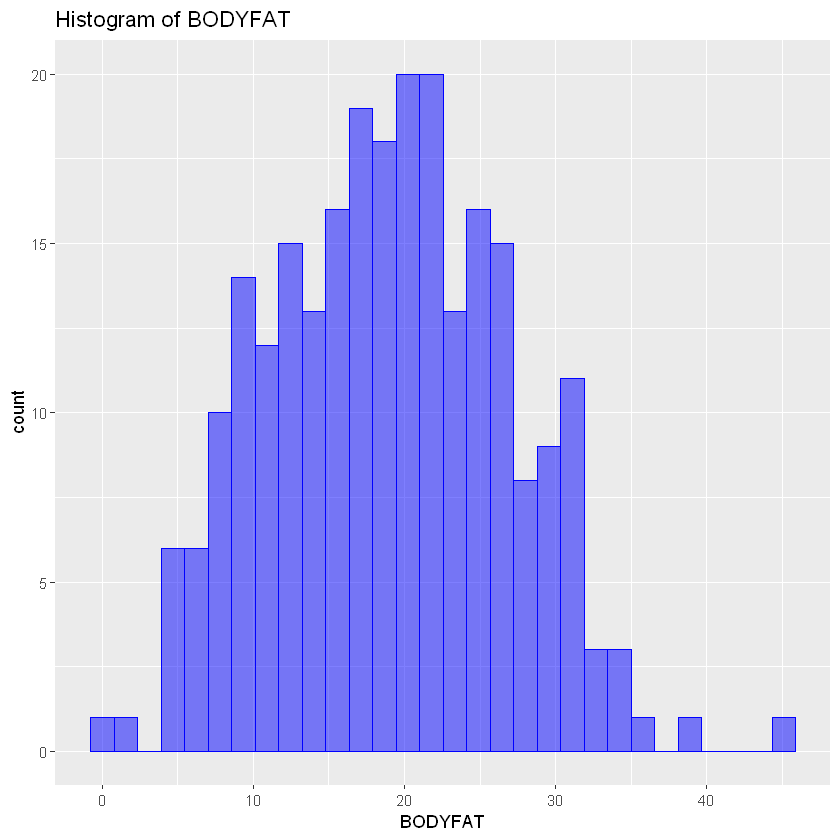

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



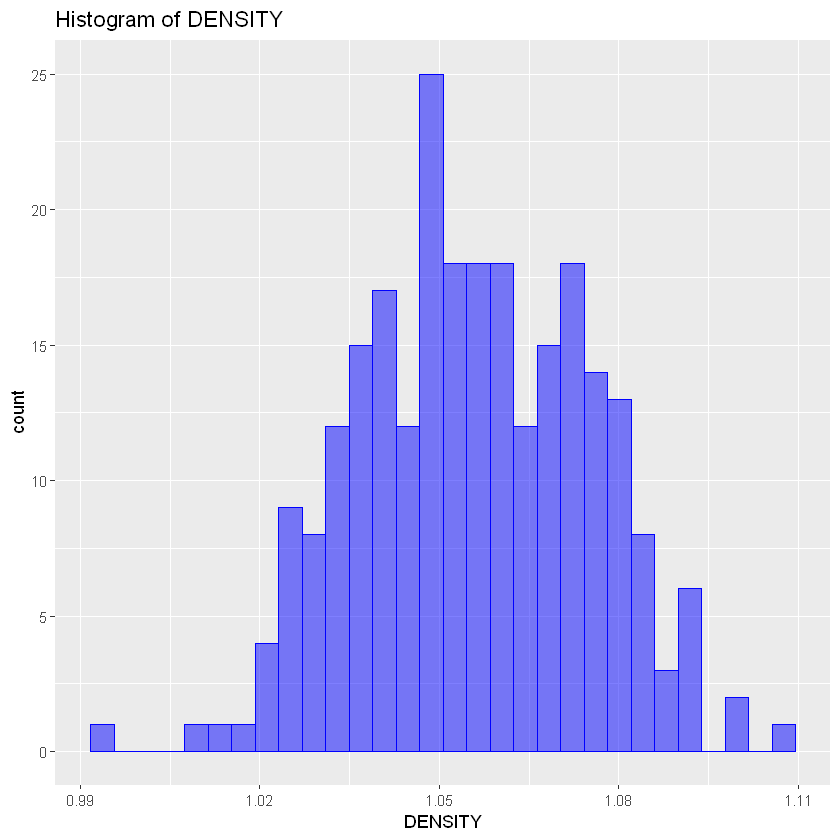

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



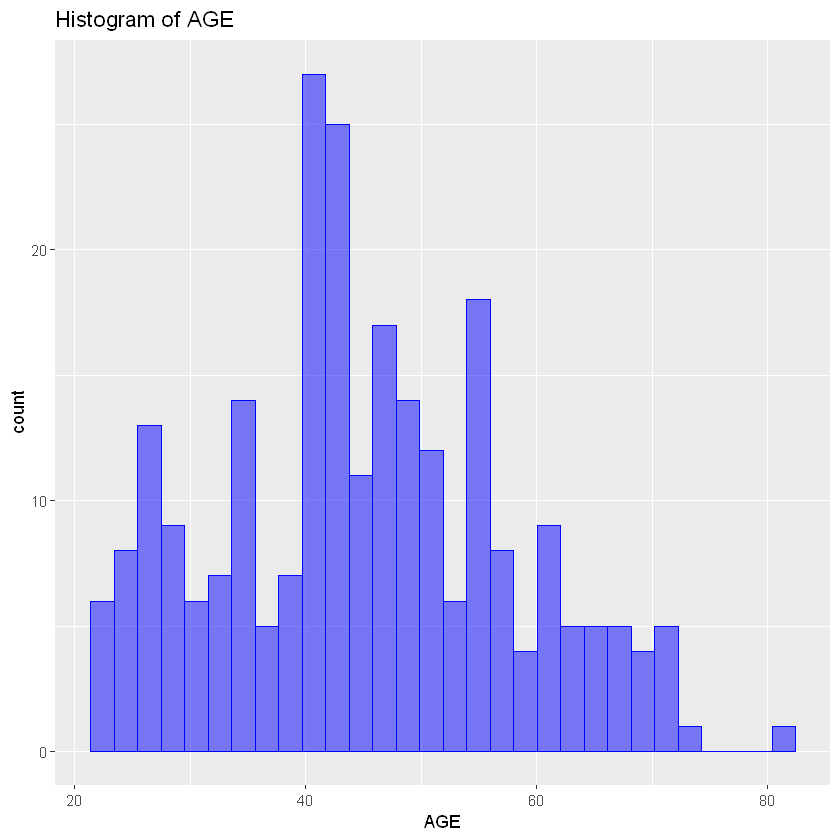

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



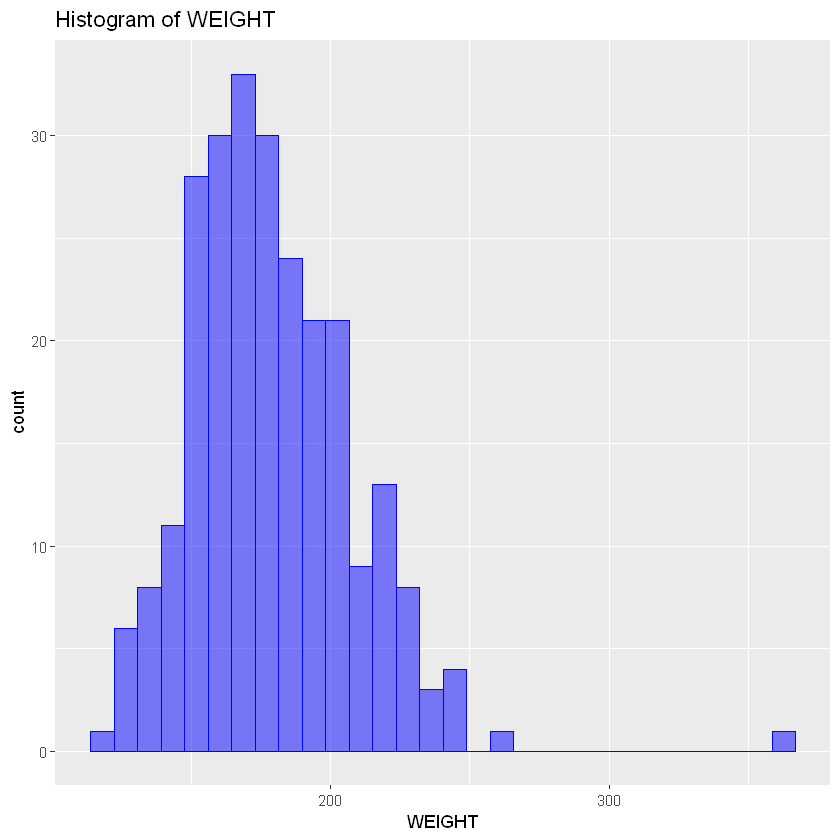

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



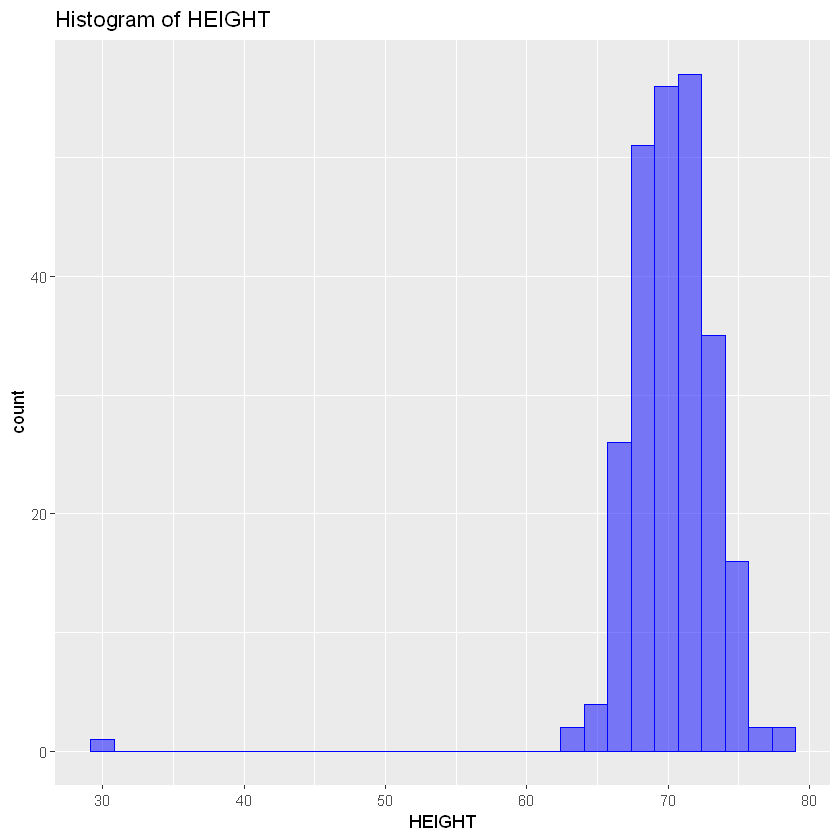

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



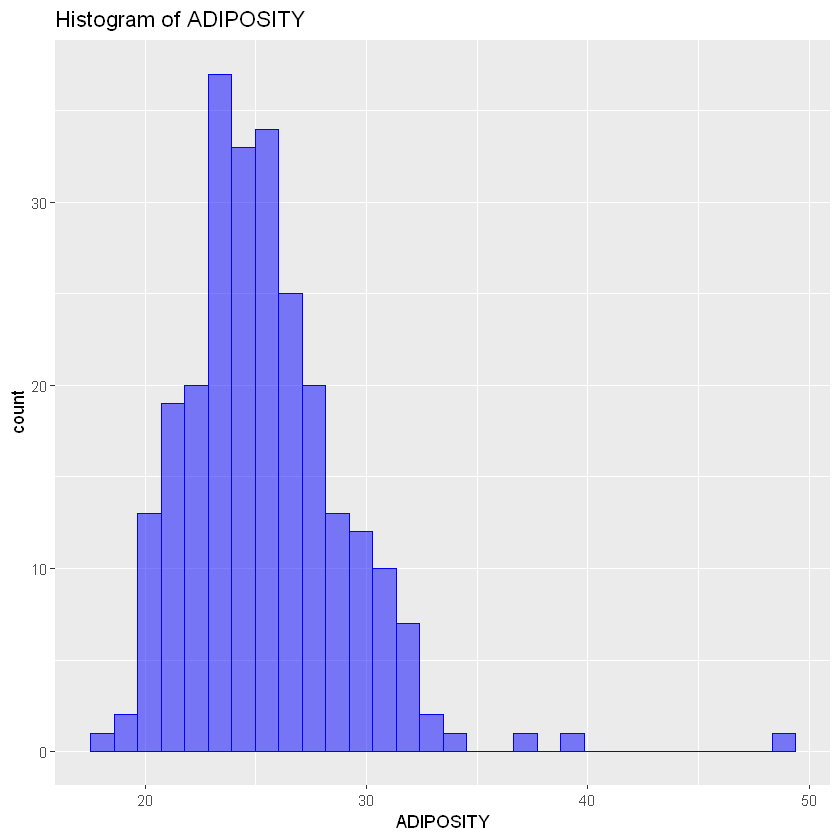

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



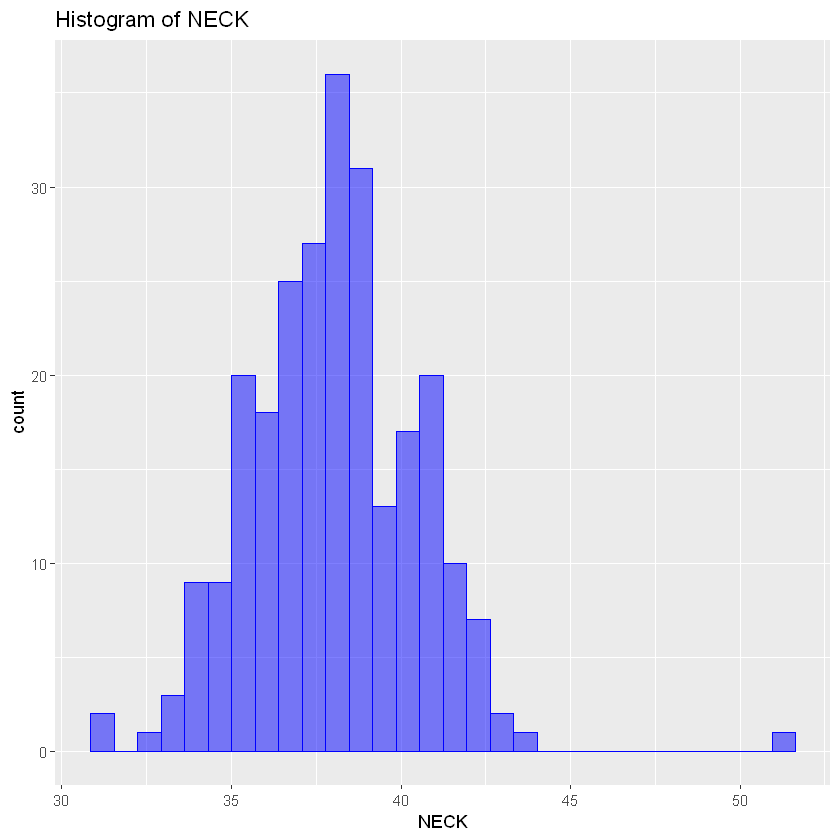

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



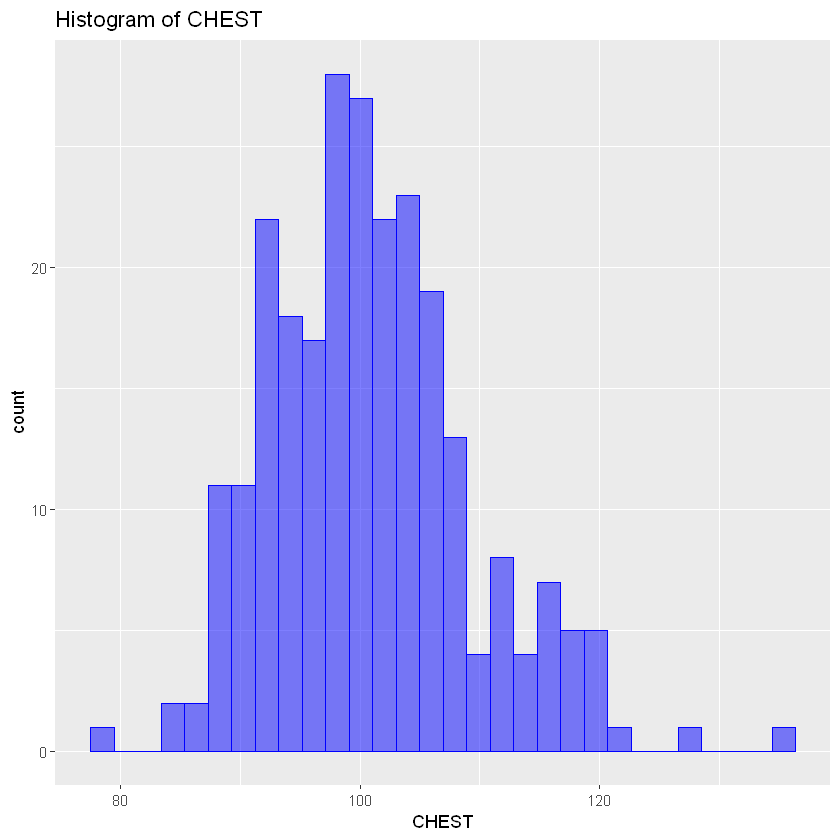

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



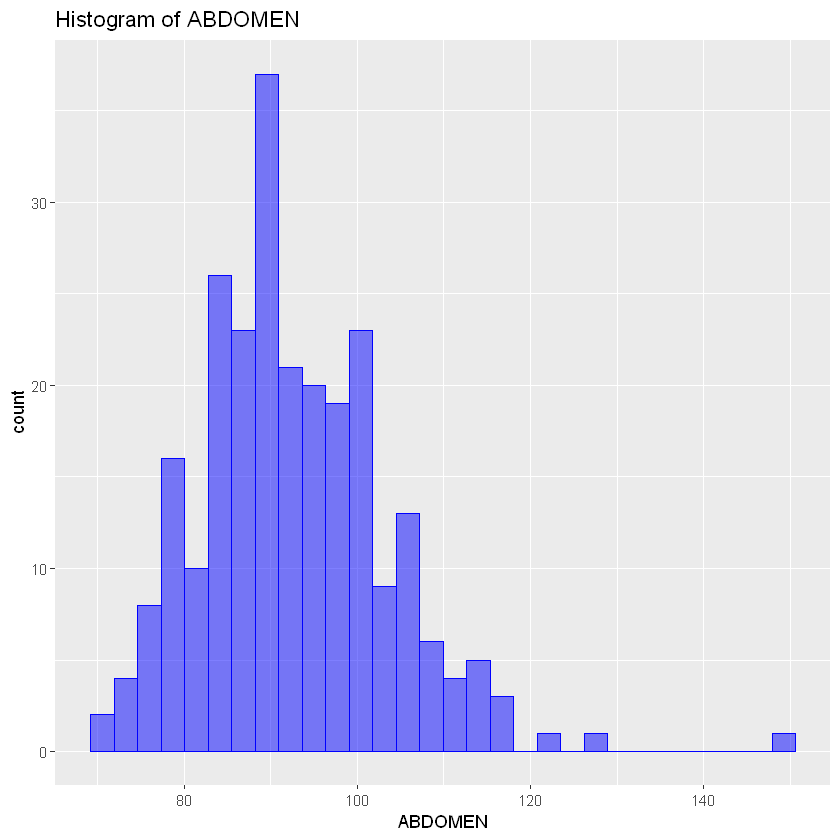

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



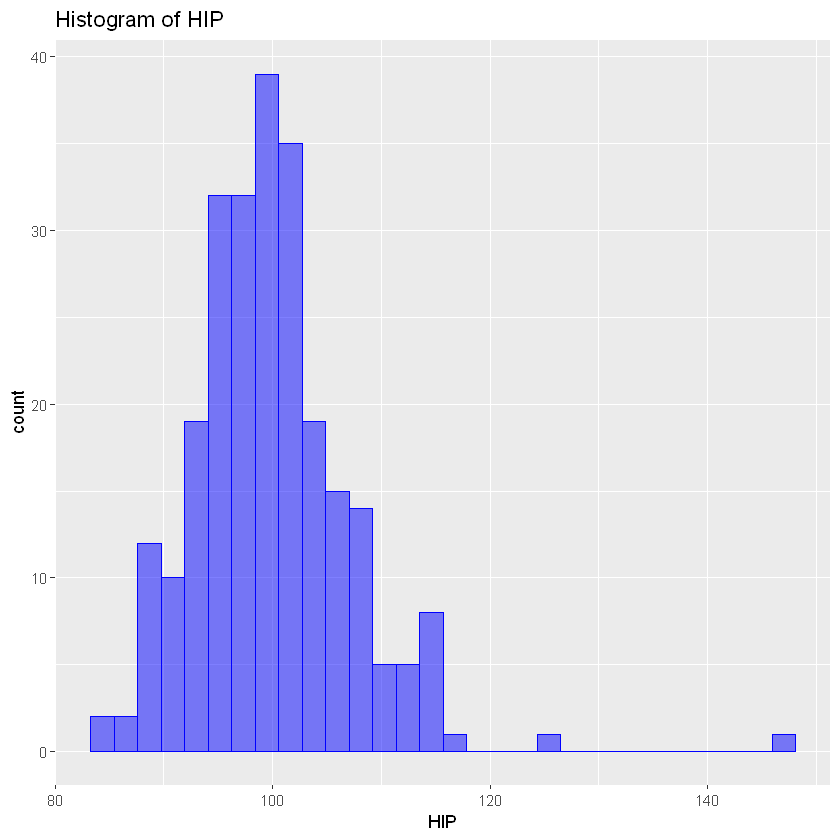

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



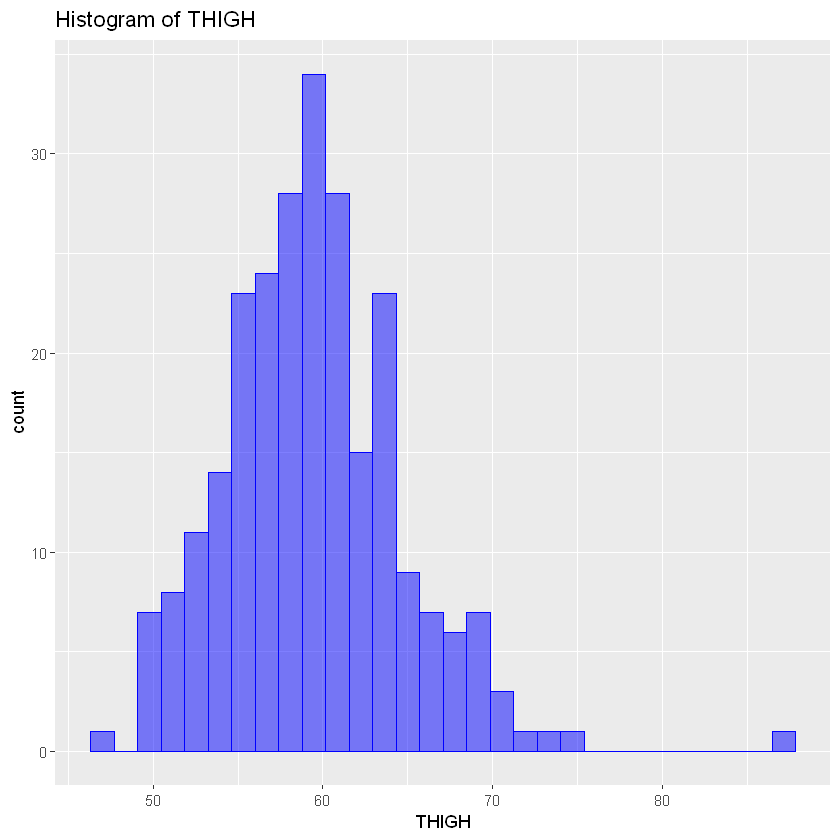

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



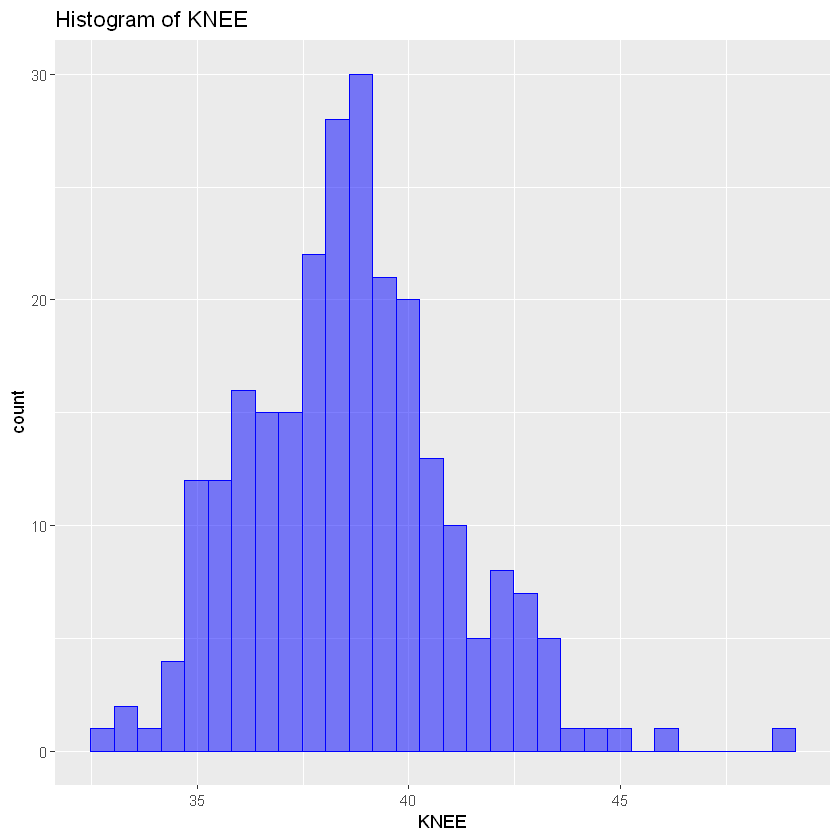

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



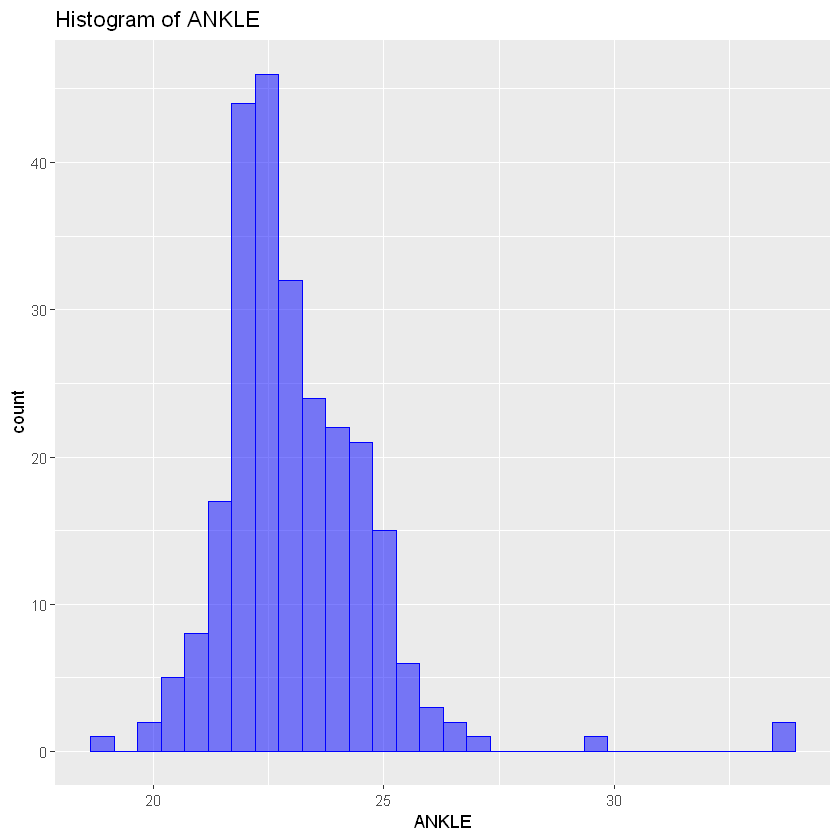

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



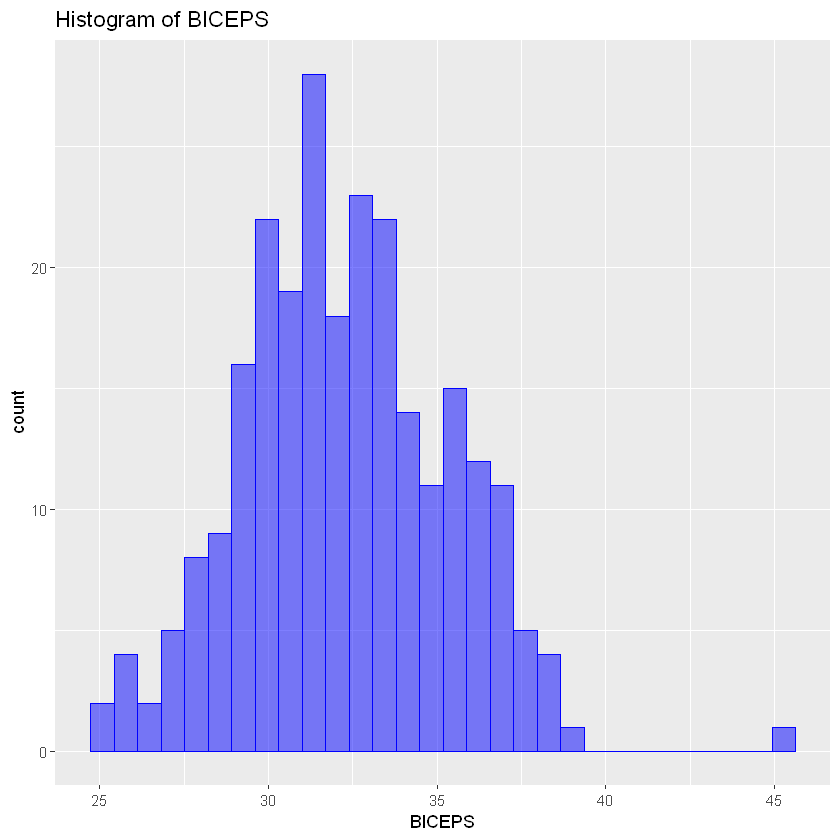

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



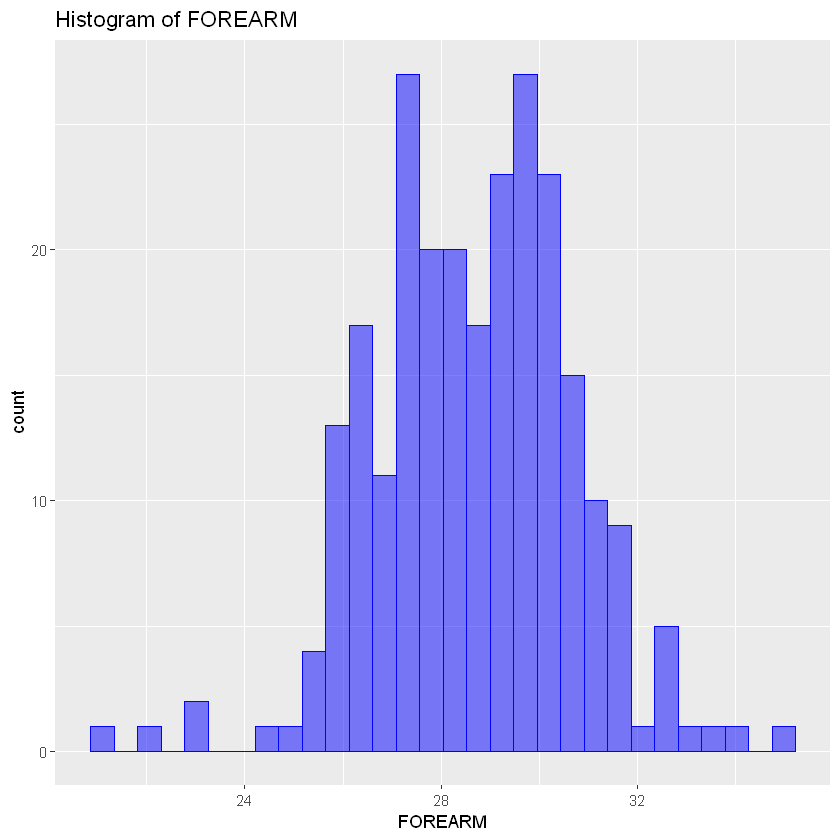

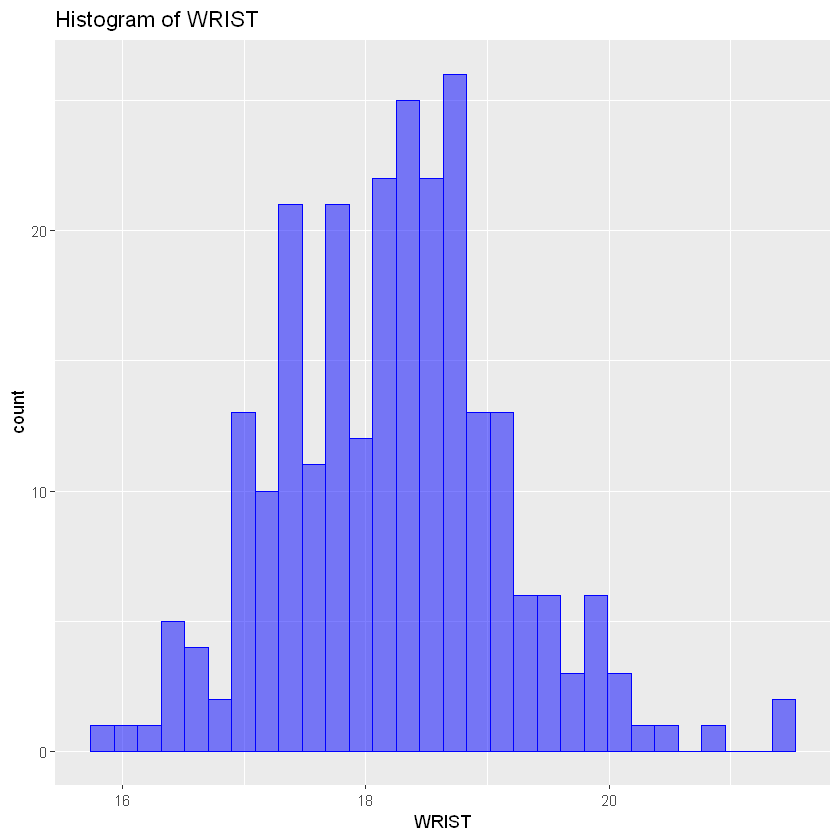

In [14]:
g1=ggplot(RawDataFrame, aes(x=BODYFAT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of BODYFAT")
g2=ggplot(RawDataFrame, aes(x=DENSITY))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of DENSITY")
g3=ggplot(RawDataFrame, aes(x=AGE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of AGE")
g4=ggplot(RawDataFrame, aes(x=WEIGHT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of WEIGHT")
g5=ggplot(RawDataFrame, aes(x=HEIGHT))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of HEIGHT")
g6=ggplot(RawDataFrame, aes(x=ADIPOSITY))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ADIPOSITY")
g7=ggplot(RawDataFrame, aes(x=NECK))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of NECK")
g8=ggplot(RawDataFrame, aes(x=CHEST))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of CHEST")
g9=ggplot(RawDataFrame, aes(x=ABDOMEN))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ABDOMEN")
g10=ggplot(RawDataFrame, aes(x=HIP))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of HIP")
g11=ggplot(RawDataFrame, aes(x=THIGH))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of THIGH")
g12=ggplot(RawDataFrame, aes(x=KNEE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of KNEE")
g13=ggplot(RawDataFrame, aes(x=ANKLE))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of ANKLE")
g14=ggplot(RawDataFrame, aes(x=BICEPS))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of BICEPS")
g15=ggplot(RawDataFrame, aes(x=FOREARM))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of FOREARM")
g16=ggplot(RawDataFrame, aes(x=WRIST))+geom_histogram(color='blue',fill='blue',alpha=0.5)+ggtitle("Histogram of WRIST")

ggsave("Image/BODYFAT_His.jpeg",g1)
ggsave("Image/DENSITY_His.jpeg",g2)
ggsave("Image/AGE_His.jpeg",g3)
ggsave("Image/WEIGHT_His.jpeg",g4)
ggsave("Image/HEIGHT_His.jpeg",g5)
ggsave("Image/ADIPOSITY_His.jpeg",g6)
ggsave("Image/NECK_His.jpeg",g7)
ggsave("Image/CHEST_His.jpeg",g8)
ggsave("Image/ABDOMEN_His.jpeg",g9)
ggsave("Image/HIP_His.jpeg",g10)
ggsave("Image/THIGH_His.jpeg",g11)
ggsave("Image/KNEE_His.jpeg",g12)
ggsave("Image/ANKLE_His.jpeg",g13)
ggsave("Image/BICEPS_His.jpeg",g14)
ggsave("Image/FOREARM_His.jpeg",g15)
ggsave("Image/WRIST_His.jpeg",g16)
g1
g2
g3
g4
g5
g6
g7
g8
g9
g10
g11
g12
g13
g14
g15
g16

From histogram plot you can see the distribution of every variables. There is some extreme values such as 0 BODYFAT, extreme low DENSITY, we will try remove or fix them in the following steps. 

From histograms we also can see that:

1. Most of BODYFAT fall into around 20%

2. Our observations' age is larger than 20, and a lot of them are in middle age

3. Most of variables is unimodal, just like what BODYFAT is

4. There are always some extreme high values in almost all variables, but there is few of extreme low values. So it seems that obesity is more common than thin people. 

### Boxplot of all variables

From boxplot we can detect several outliers, we will find them in dataset and study them. The boxplot contains two lines which are upper and lower quartiles. Points which are out of the range of upper and lower quartiles will be regarded as our outliers. But we will also examine them without boxplot. 

In [15]:
g1=ggplot(RawDataFrame,aes(x=BODYFAT))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("BODYFAT")
g2=ggplot(RawDataFrame,aes(x=DENSITY))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("DENSITY")
g3=ggplot(RawDataFrame,aes(x=AGE))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("AGE")
g4=ggplot(RawDataFrame,aes(x=WEIGHT))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("WEIGHT")
g5=ggplot(RawDataFrame,aes(x=HEIGHT))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("HEIGHT")
g6=ggplot(RawDataFrame,aes(x=ADIPOSITY))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("ADIPOSITY")
g7=ggplot(RawDataFrame,aes(x=NECK))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("NECK")
g8=ggplot(RawDataFrame,aes(x=CHEST))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("CHEST")
g9=ggplot(RawDataFrame,aes(x=ABDOMEN))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("ABDOMEN")
g10=ggplot(RawDataFrame,aes(x=HIP))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("HIP")
g11=ggplot(RawDataFrame,aes(x=THIGH))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("THIGH")
g12=ggplot(RawDataFrame,aes(x=KNEE))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("KNEE")
g13=ggplot(RawDataFrame,aes(x=ANKLE))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("ANKLE")
g14=ggplot(RawDataFrame,aes(x=BICEPS))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("BICEPS")
g15=ggplot(RawDataFrame,aes(x=FOREARM))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("FOREARM")
g16=ggplot(RawDataFrame,aes(x=WRIST))+geom_boxplot(color='blue',fill='blue',alpha=0.5)+ coord_flip()+ggtitle("WRIST")
g=grid.arrange(g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12, g13, g14, g15, g16, nrow = 4)
ggsave("Image/Boxplot_all.jpeg",g)
g

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"


ERROR: Error: stat_boxplot requires the following missing aesthetics: y


Now we will clean our dataset. Our raw data should pass three levels of data clean process: First is boxplot, check any Null or abnormal value, Second, BODYFAT and DENSITY must meet Siri equation, Third, WEIGHT and HIGHT must meet BMI formula

### Outliers of Boxplot

There is no NULL value in our dataset. 

From boxplot we found the following outliers. The number after variables is the IDNO in BodyFat.csv from the boxplot of this variables.

We pick every outliers from boxplot, this outliers may influence our regression steps. 

Outliers observation is not unrealistic one, but their existence will affect the regression and change the coefficients greatly than other do, but they are very rare in real life. In fact it is a trade off to keep the outliers. In our analysis we decide to remove them because there are only 4 outliers. 

182 with BODYFAT 0, which is not shown in boxplot, reminding us to check the data again without boxplot to find outliers. 

BODYFAT: 216, 182

DENSITY: 216

AGE:

WEIGHT: 39, 41

HEIGHT: 42

ADIPOSITY: 39, 41, 216, 242

NECK: 39, 45, 106

CHEST: 39, 41

ABDOMEN: 39, 41, 216

HIP: 39, 41, 35

THIGH:39, 169, 152

KNEE: 39, 244, 192

ANKLE:31, 86, 39

BICEPS:39

FOREARM:159, 206, 45,226, 175

WRIST:41,39,252,226

182, his BODYFAT is 0, which is impossible, calculate his BODYFAT by Siri equation, his BODYFAT should be: -3.611687, which is also impossible, we decide to delete him.

216 has outstanding BODYFAT, check his weight, we define 216 as an extremely obesity case, we decide to delete him.

39 occurs too many time in boxplot, just like 216, he is also an obesity case with too many outliers value, we decide to delete him. 

42 whose HEIGHT is 29.5 inches (74.93 cm), which is too short, which can be fixed in BMI function(see below section for detail), the real HEIGHT is 69.4255 inches (176.34077 cm)

41 occurs too many time in boxplot, just like 39, he is also an obesity case with too many outliers value, we decide to delete him


In [16]:
FirstFilterData=data.frame(RawData[-c(182,216,39,41),])
realheight=sqrt(703*FirstFilterData[FirstFilterData$IDNO==42,"WEIGHT"]/FirstFilterData[FirstFilterData$IDNO==42,"ADIPOSITY"])
realheight
FirstFilterData[FirstFilterData$IDNO==42,"HEIGHT"]=realheight

[1] 69.4255

In [17]:
dim(FirstFilterData)

[1] 248  17

### Outliers of Siri Equation

There is strong connection between BODYFAT and DENSITY, which is called Siri Equation:

$$\text{BODYFAT}\ (100*B)= \frac{495}{\text{DENSITY}} - 450$$

We will try to fit the BODYFAT with 1/DENSITY and detect any outliers. 

The following four plots are outputs from linear regression between BODYFAT with 1/DENSITY

png 
  2

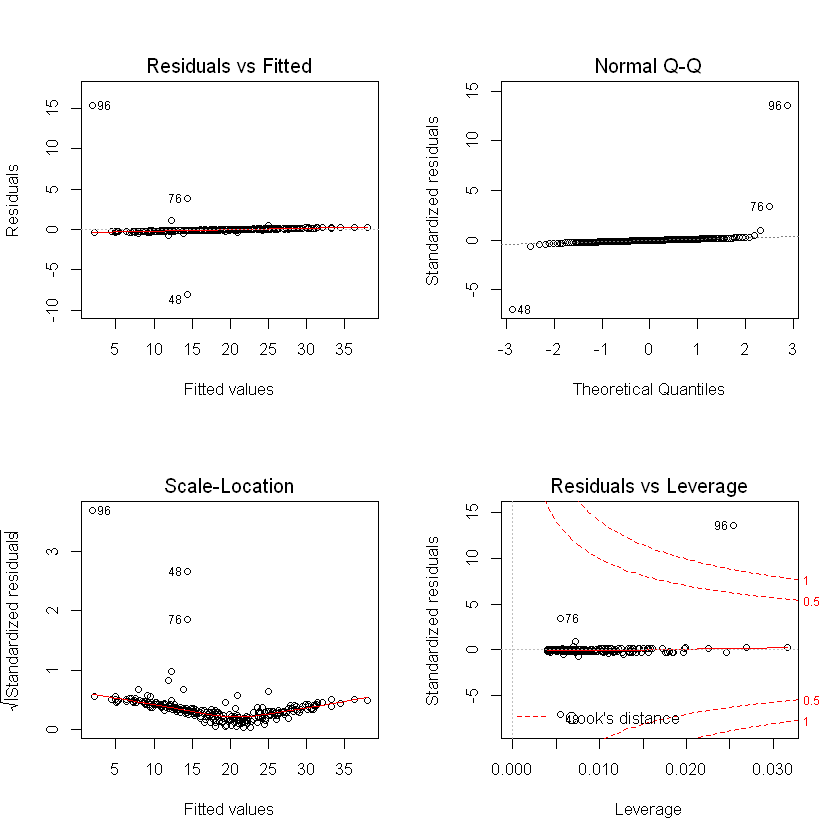

In [18]:
FirstFilterData[,"invDENSITY"]=1/FirstFilterData$DENSITY
SiriModel=lm(BODYFAT~invDENSITY,data=FirstFilterData)
par(mfrow=c(2,2)) 
plot(SiriModel)


jpeg(file="Image/Siri_Equation_Outliers.jpeg")
par(mfrow=c(2,2)) 
plot(SiriModel)
dev.off()

We plot the output of linear regression and outliers. 

Saving 6.67 x 6.67 in image



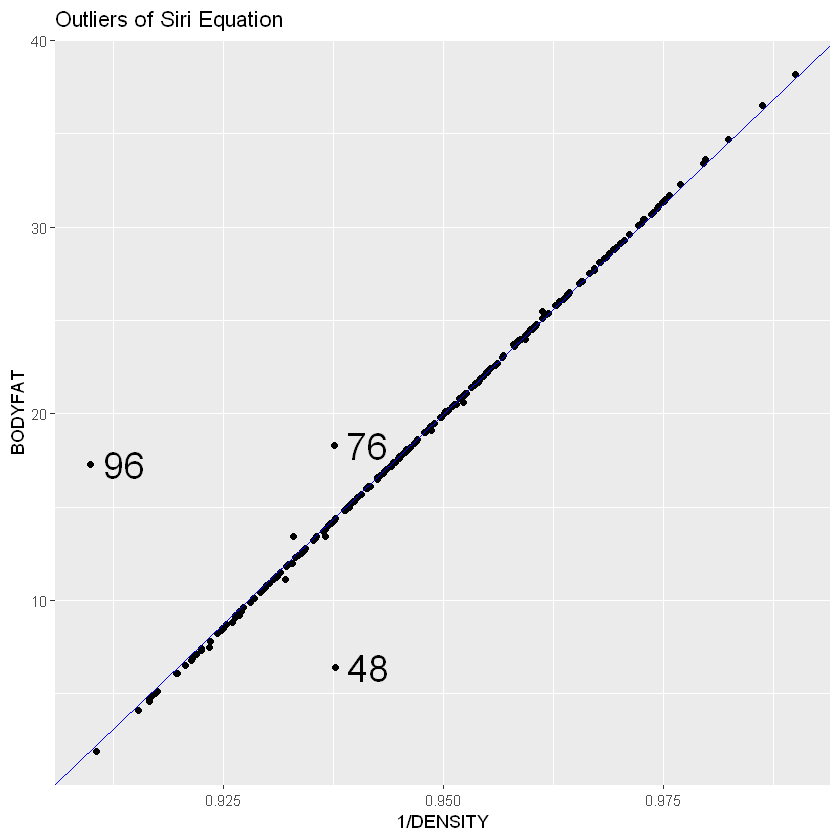

In [19]:
sirioutliers=FirstFilterData$IDNO %in% c(96, 48, 76)

g=ggplot(data=FirstFilterData)+geom_point(aes(x=invDENSITY,y=BODYFAT))+
geom_abline(intercept = SiriModel$coefficients[1],slope=SiriModel$coefficients[2],color="blue")+
xlab("1/DENSITY")+
ylab("BODYFAT")+
ggtitle("Outliers of Siri Equation")+
geom_text(data=FirstFilterData[sirioutliers,],aes(x=invDENSITY,y=BODYFAT,label=IDNO),size = 8,hjust = -0.3)
ggsave("Image/Outliers_of_Siri_Equation.jpeg",g)
g


96, 76, 48's BODYFAT do not meet their DENSITY by Siri Equation, we decide to use the Siri equation calculate their BODYFAT again and update.


In [20]:
for(i in c(96,76,48)){
  NewBODYFAT=495/FirstFilterData[FirstFilterData$IDNO==i,"DENSITY"]-450
  print(paste(i,"new BODYFAT:"))  
  print(NewBODYFAT)
}

for(i in c(96,76,48)){
  NewDENSITY=495/(SecondFilterData[FirstFilterData$IDNO==i,"BODYFAT"]+450)
  print(paste(i,"new DENSITY:"))  
  print(NewDENSITY)
}

[1] "96 new BODYFAT:"
[1] 0.3684833
[1] "76 new BODYFAT:"
[1] 14.09151
[1] "48 new BODYFAT:"
[1] 14.13502


ERROR: Error in eval(expr, envir, enclos): object 'SecondFilterData' not found


We found that the new BODYFAT of 96 is too small compared with other people, so we decide to use the his initial BODYFAT to update his DENSITY with Siri equation, instead of changing his BODYFAT. BODYFAT of 48 also changed too high, but considering that BODYFAT is from DENSITY by Siri equation, we prefer to change BODYFAT first. 


In [21]:
SecondFilterData=FirstFilterData[,-which(names(FirstFilterData) %in% c("invDENSITY"))]
SecondFilterData[SecondFilterData$IDNO==48,"BODYFAT"]=495/SecondFilterData[SecondFilterData$IDNO==48,"DENSITY"]-450
SecondFilterData[SecondFilterData$IDNO==76,"BODYFAT"]=495/SecondFilterData[SecondFilterData$IDNO==76,"DENSITY"]-450
SecondFilterData[SecondFilterData$IDNO==96,"DENSITY"]=495/(SecondFilterData[SecondFilterData$IDNO==96,"BODYFAT"]+450)

### Outliers of BMI Equation

Just like BODYFAT and DENSITY. WEIGHT, HEIGHT and ADIPOSITY also meet BMI equation:

$$\text{ADIPOSITY} = \frac{703*\text{WEIGHT (lbs)}}{\text{HEIGHT(inches)}^{2}} $$

This equation is in imperial unit, pay attention to 703 in our equation. 

The following four plots are outputs from linear regression between ADIPOSITY with WEIGHT/HEIGHT^2

We call the new variable with weight, height as BMIX

png 
  2

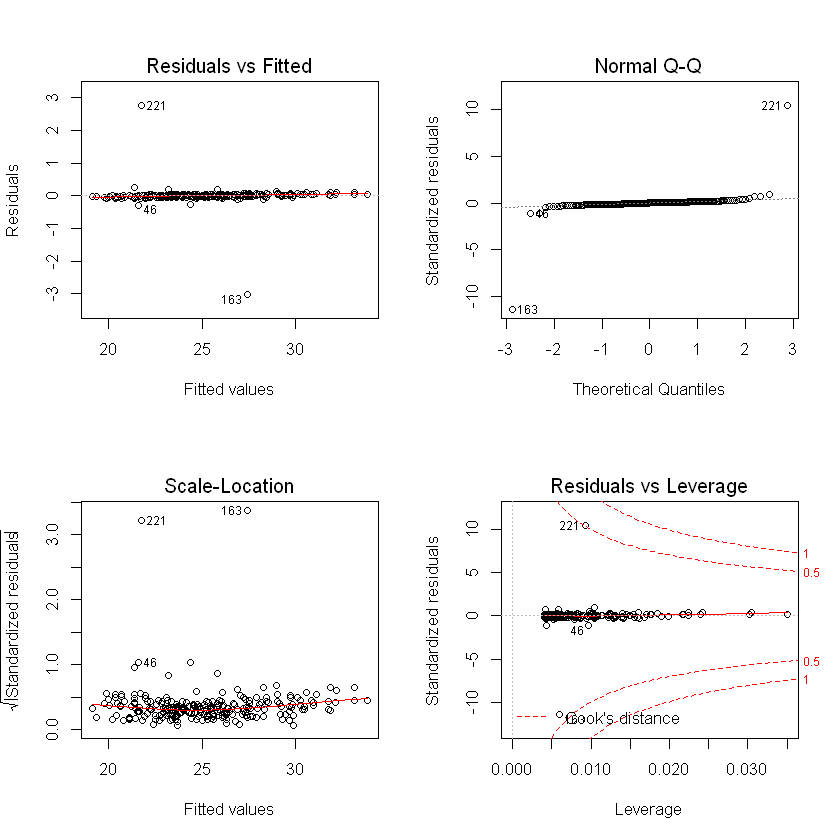

In [22]:
SecondFilterData[,"BMIX"]=(SecondFilterData$WEIGHT)/((SecondFilterData$HEIGHT)^2)
BMIModel=lm(ADIPOSITY~BMIX,data=SecondFilterData)
par(mfrow=c(2,2)) 
plot(BMIModel)
jpeg(file="Image/BMI_Outliers.jpeg")
par(mfrow=c(2,2)) 
plot(BMIModel)
dev.off()

We plot the output of linear regression and outliers. 

Saving 6.67 x 6.67 in image



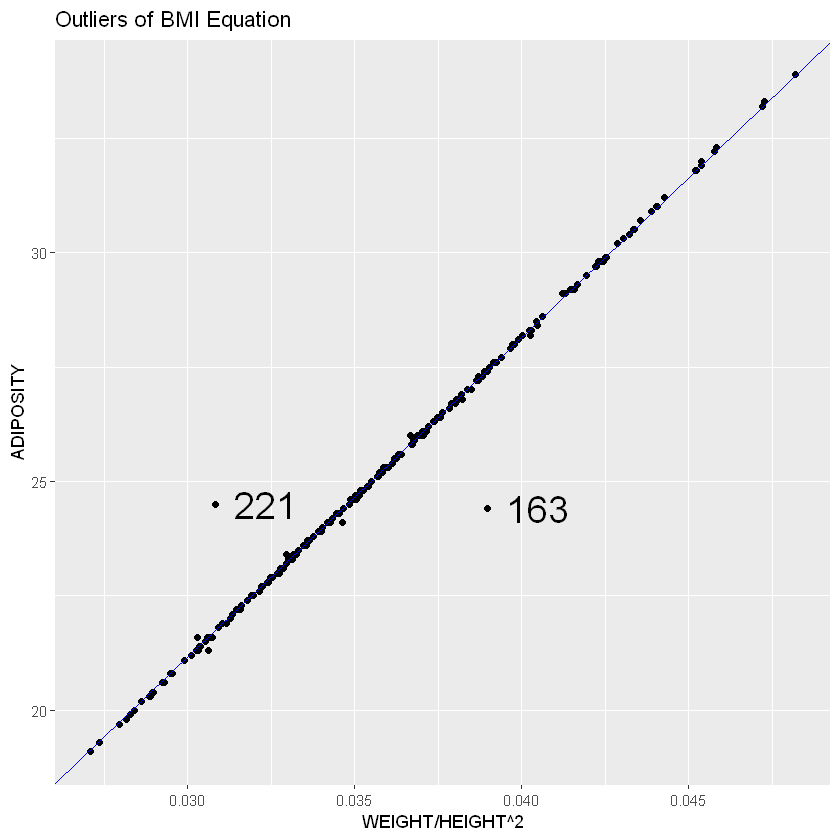

In [23]:
bmioutliers=SecondFilterData$IDNO %in% c(221, 163)

g=ggplot(data=SecondFilterData)+geom_point(aes(x=BMIX,y=ADIPOSITY))+
geom_abline(intercept = BMIModel$coefficients[1],slope=BMIModel$coefficients[2],color="blue")+
xlab("WEIGHT/HEIGHT^2")+
ylab("ADIPOSITY")+
ggtitle("Outliers of BMI Equation")+
geom_text(data=SecondFilterData[bmioutliers,],aes(x=BMIX,y=ADIPOSITY,label=IDNO),size = 8,hjust = -0.3)

ggsave("Image/Outliers_of_BMI_Equation.jpeg",g)

g

The two outliers is 221 and 163, their new BMI is:

In [24]:
NewBMI=c()
for(i in c(163,221)){
  NewBMI=c(NewBMI,703*SecondFilterData[SecondFilterData$IDNO==i,"WEIGHT"]/(SecondFilterData[SecondFilterData$IDNO==i,"HEIGHT"]^2))
  print(paste(i,"new BMI is:"))
  print(703*SecondFilterData[SecondFilterData$IDNO==i,"WEIGHT"]/(SecondFilterData[SecondFilterData$IDNO==i,"HEIGHT"]^2))
}
NewBMI

[1] "163 new BMI is:"
[1] 27.40422
[1] "221 new BMI is:"
[1] 21.67592


[1] 27.40422 21.67592

No problem, they are in normal range, update their new BMI:

In [25]:
CleanData=SecondFilterData[,-which(names(SecondFilterData) %in% c("BMIX"))]
CleanData[CleanData$IDNO==163,"ADIPOSITY"]=NewBMI[1]
CleanData[CleanData$IDNO==221,"ADIPOSITY"]=NewBMI[2]
CleanData=data.frame(CleanData)
dim(CleanData)

[1] 248  17

Now we can update our data:

In [26]:
write.csv(CleanData,'Data/CleanData.csv',row.names = FALSE)

We can build a table for what we do in our dataset:

In [27]:
Fixed_IDNO=c(182,216,39,41,42,96,76,48,221,163)
Method=c("Delete for extreme value",
         "Delete for extreme value",
         "Delete for extreme value",
         "Delete for extreme value",
         "Fix HEIGHT by BMI equation",
         "Fix DENSITY by Siri equation",
         "Fix BODYFAT by Siri equation",
         "Fix BODYFAT by Siri equation",
         "Fix ADIPOSITY by BMI equation",
         "Fix ADIPOSITY by BMI equation")
Fix_Method=cbind(Fixed_IDNO,Method)
Fix_Method

Fixed_IDNO,Method
182,Delete for extreme value
216,Delete for extreme value
39,Delete for extreme value
41,Delete for extreme value
42,Fix HEIGHT by BMI equation
96,Fix DENSITY by Siri equation
76,Fix BODYFAT by Siri equation
48,Fix BODYFAT by Siri equation
221,Fix ADIPOSITY by BMI equation
163,Fix ADIPOSITY by BMI equation


In fact, there is a lot of extreme value in our dataset, especially in regression steps. But considering there is only about 250 observations, we prefer to fix observations instead of deleting them

## Recheck by BMI and Siri equation

Recheck whether our CleanData meets BMI and Siri equation.

### Siri equation

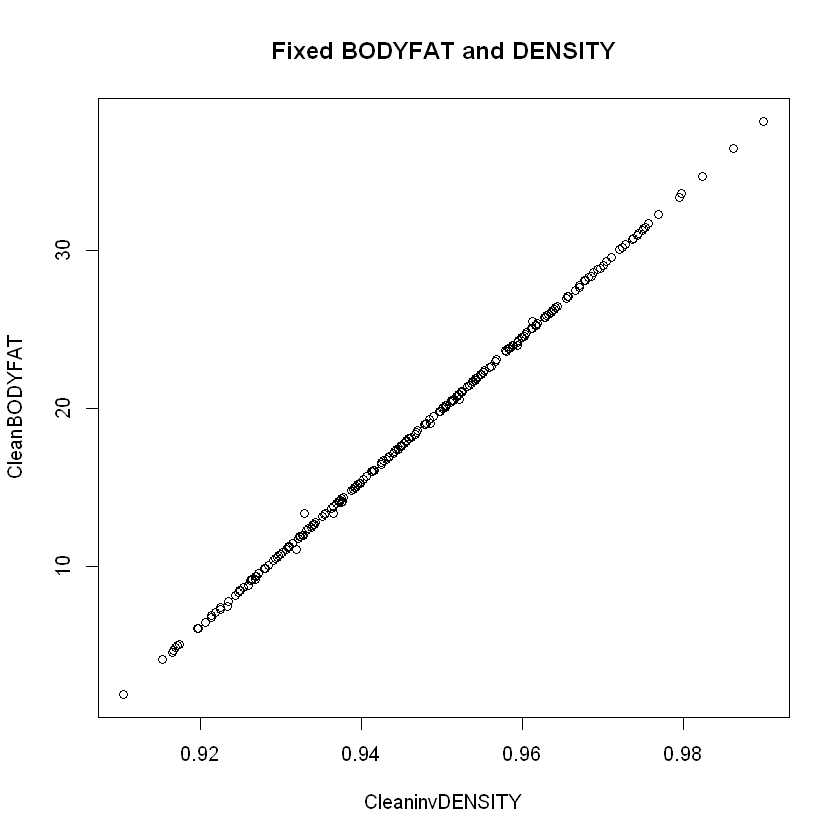

png 
  2

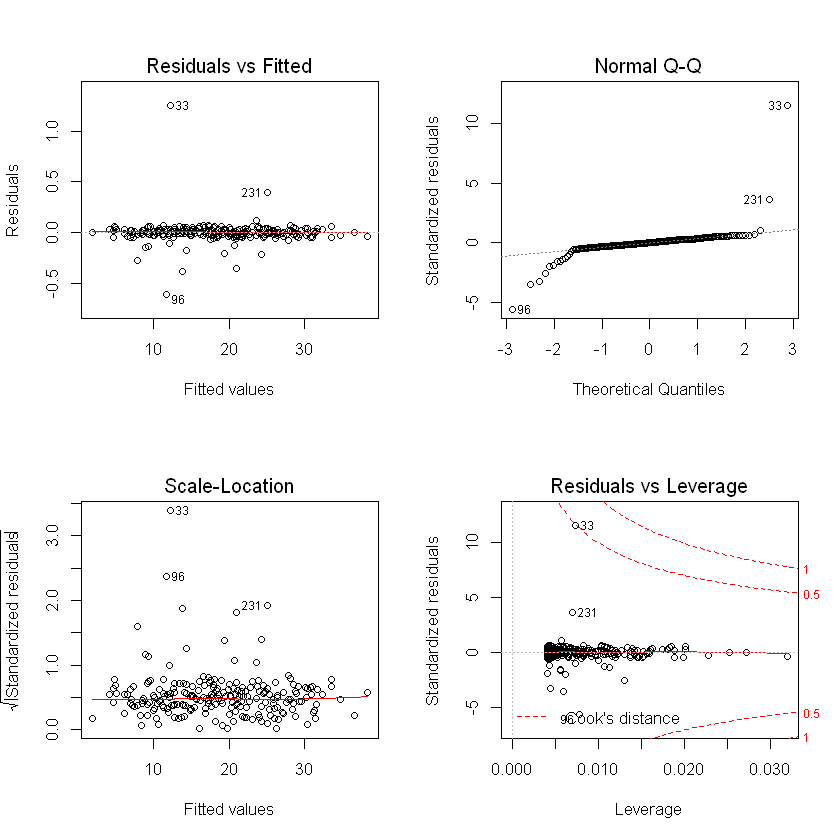

In [28]:
CleaninvDENSITY=1/(CleanData$DENSITY)
CleanBODYFAT=CleanData$BODYFAT
SiriModel=lm(CleanBODYFAT~CleaninvDENSITY)
plot(CleanBODYFAT~CleaninvDENSITY,main="Fixed BODYFAT and DENSITY")
par(mfrow=c(2,2)) 
plot(SiriModel)

jpeg(file="Image/Fixed_BODYFAT_and_DENSITY.jpeg")
par(mfrow=c(3,2))
plot(CleanBODYFAT~CleaninvDENSITY,main="Fixed BODYFAT and DENSITY") 
plot(SiriModel)
dev.off()

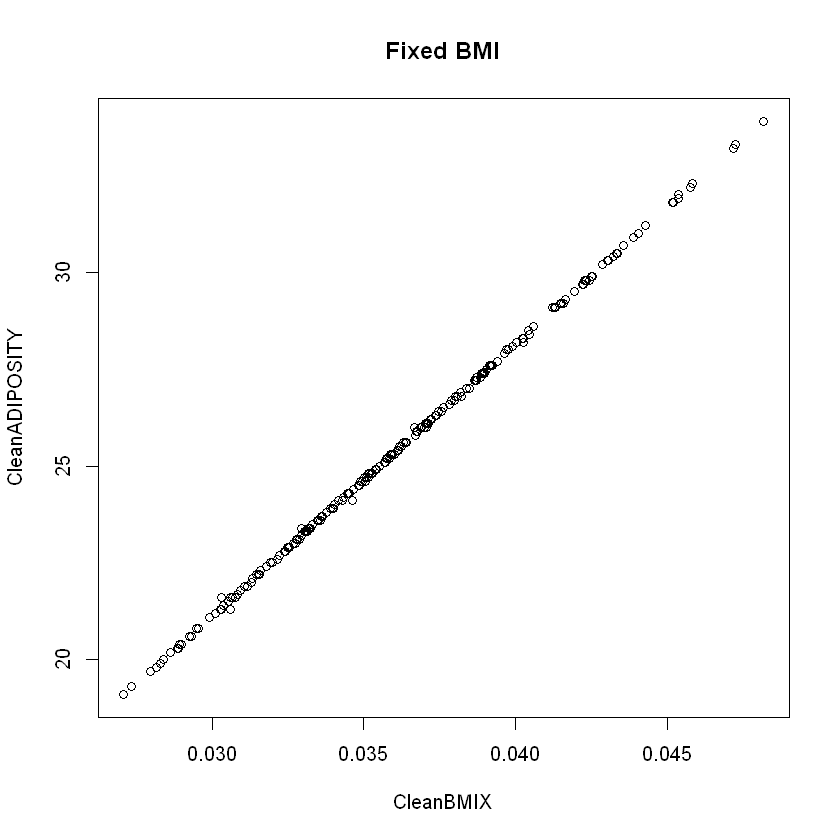

png 
  2

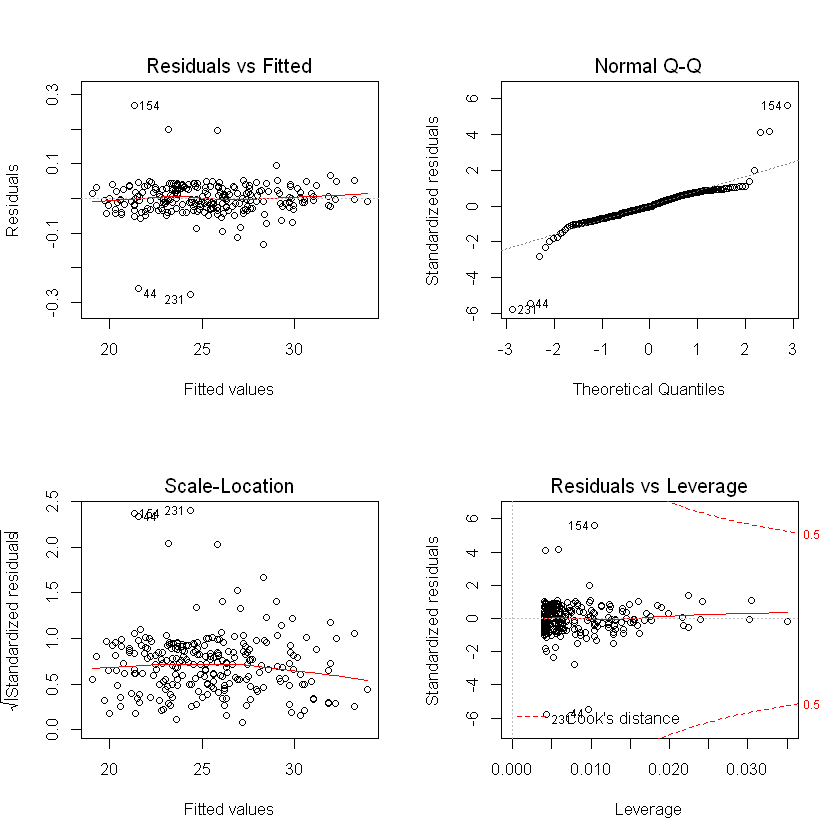

In [29]:

CleanADIPOSITY=CleanData$ADIPOSITY
CleanBMIX=(CleanData$WEIGHT)/((CleanData$HEIGHT)^2)
BMIModel=lm(CleanADIPOSITY~CleanBMIX)
plot(CleanADIPOSITY~CleanBMIX,main="Fixed BMI")
par(mfrow=c(2,2)) 
plot(BMIModel)

jpeg(file="Image/Fixed_BMI.jpeg")
par(mfrow=c(3,2))
plot(CleanADIPOSITY~CleanBMIX,main="Fixed BMI") 
plot(BMIModel)
dev.off()

There is no outliers from BMI and Siri equation now. 

## Model Build-PCA

Our group first use PCA to handle our data for linear regression, although the results are not good, we still want to show them. 

PCA finds the best linear combination of raw data to generate linearly uncorrelated data. 

The first 2 components explain over 90% variance. We use them for linear regression. 

In [30]:
head(CleanData)

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.9598 1.2383 0.99718 0.84027 0.77778 0.56649 0.54106
Proportion of Variance 0.6258 0.1095 0.07103 0.05043 0.04321 0.02292 0.02091
Cumulative Proportion  0.6258 0.7353 0.80632 0.85675 0.89996 0.92288 0.94379
                           PC8    PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.51776 0.4443 0.3722 0.28123 0.25783 0.18798 0.04472
Proportion of Variance 0.01915 0.0141 0.0099 0.00565 0.00475 0.00252 0.00014
Cumulative Proportion  0.96294 0.9770 0.9869 0.99259 0.99733 0.99986 1.00000

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     29.7986 13.1304 4.51975 3.17140 2.55842 1.93202 1.52995
Proportion of Variance  0.7989  0.1551 0.01838 0.00905 0.00589 0.00336 0.00211
Cumulative Proportion   0.7989  0.9540 0.97235 0.98140 0.98729 0.99065 0.99276
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.46858 1.34131 1.27521 1.12398 0.96575 0.48950 0.18340
Proportion of Variance 0.00194 0.00162 0.00146 0.00114 0.00084 0.00022 0.00003
Cumulative Proportion  0.99470 0.99632 0.99778 0.99892 0.99975 0.99997 1.00000

,PC1,PC2
AGE,0.004635593,-0.963142255
WEIGHT,0.878716057,0.078483446
HEIGHT,0.043773736,0.058606793
ADIPOSITY,0.093424337,-0.031450032
NECK,0.060349947,-0.017946054
CHEST,0.237119093,-0.115436958
ABDOMEN,0.294547710,-0.194821160
HIP,0.194651306,0.037820047
THIGH,0.137994841,0.088315438
KNEE,0.066699841,0.001514925


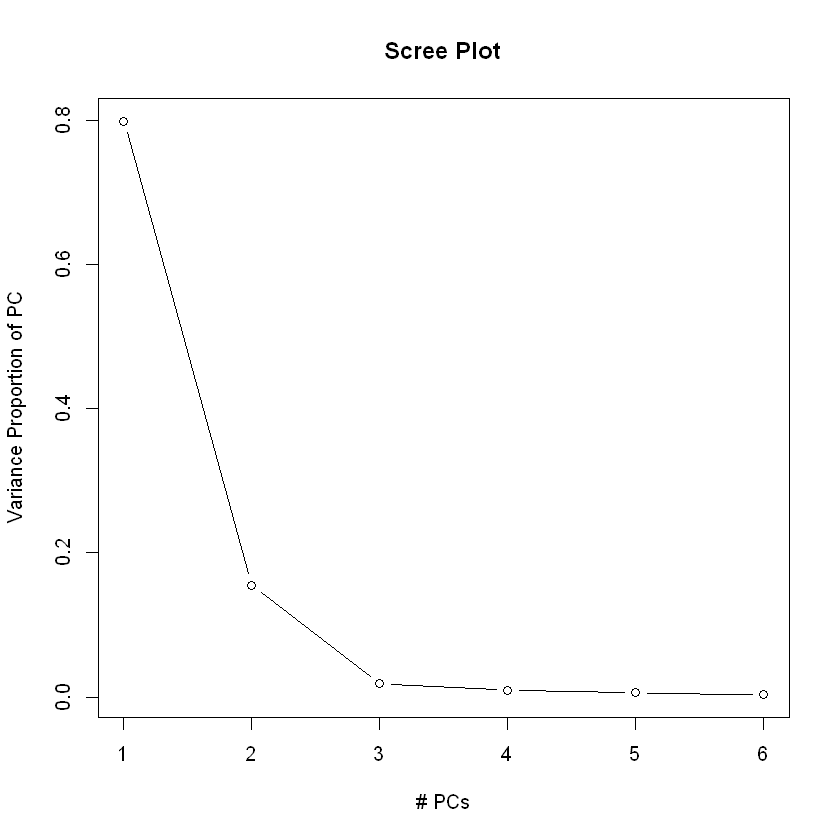

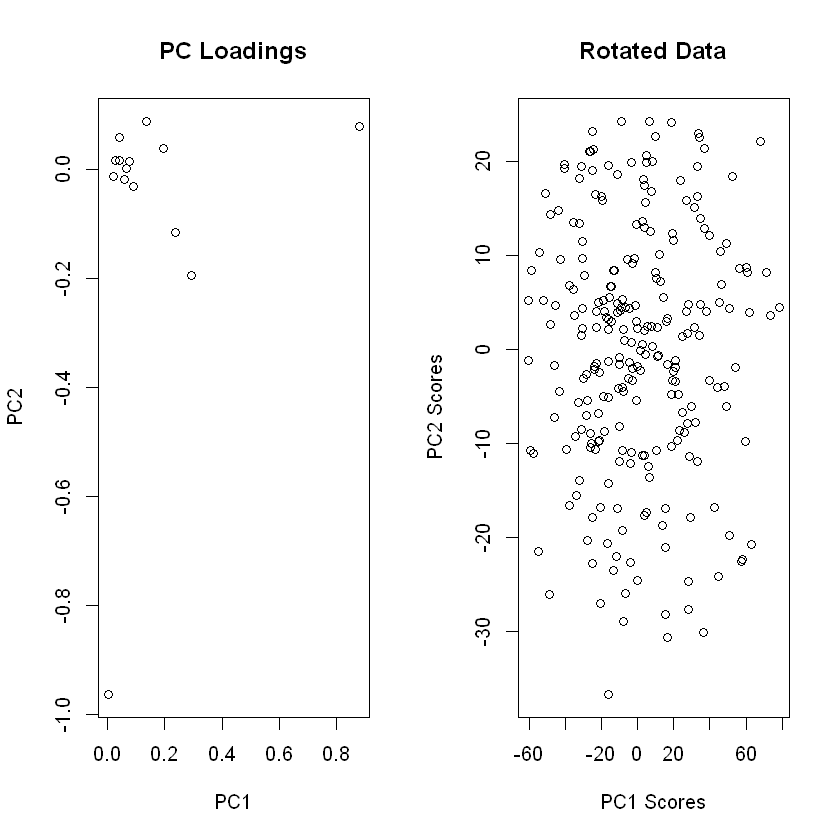

In [40]:
data.pca1 <- prcomp(CleanData[,4:17],scale=TRUE)
data.pca2 <- prcomp(CleanData[,4:17])

summary(data.pca1)
summary(data.pca2)

prop <- c()
for(i in 1:length(data.pca2$sdev)){
  prop[i] <- (data.pca2$sdev[i])^2/sum((data.pca2$sdev)^2)  
}

plot(1:6, prop[1:6], type = "b", xlab = "# PCs", ylab ="Variance Proportion of PC", main = "Scree Plot")

data.pca2$rotation[,1:2]

PCAData=data.pca2$x

par(mfrow=c(1,2))
plot(data.pca2$rotation[,1:2], main="PC Loadings")
plot(PCAData[,1:2],xlab="PC1 Scores",ylab="PC2 Scores", main="Rotated Data")

According to the summary and scree plot, 2 PCs explains 97.7% of variation. The first PC has large positive loadings for Weight 

In [35]:
PCAModel.1PC=lm((CleanData$BODYFAT)~PCAData[,1])
summary(PCAModel.1PC)

PCAModel.2PC=lm((CleanData$BODYFAT)~PCAData[,c(1,2)])
summary(PCAModel.2PC)


Call:
lm(formula = (CleanData$BODYFAT) ~ PCAData[, 1])

Residuals:
    Min      1Q  Median      3Q     Max 
-16.226  -3.932   0.115   4.430  15.251 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.80656    0.36135   52.05   <2e-16 ***
PCAData[, 1]  0.15883    0.01215   13.07   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.691 on 246 degrees of freedom
Multiple R-squared:  0.4099,	Adjusted R-squared:  0.4075 
F-statistic: 170.9 on 1 and 246 DF,  p-value: < 2.2e-16



Call:
lm(formula = (CleanData$BODYFAT) ~ PCAData[, c(1, 2)])

Residuals:
     Min       1Q   Median       3Q      Max 
-12.4345  -4.1849   0.1122   3.7693  14.3257 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           18.80656    0.33029  56.939  < 2e-16 ***
PCAData[, c(1, 2)]PC1  0.15883    0.01111  14.301  < 2e-16 ***
PCAData[, c(1, 2)]PC2 -0.17723    0.02521  -7.031 2.03e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.201 on 245 degrees of freedom
Multiple R-squared:  0.509,	Adjusted R-squared:  0.505 
F-statistic:   127 on 2 and 245 DF,  p-value: < 2.2e-16


The results are not good both in R square and sum of residual, the reason is that not all variables are optimal for model. Meanwhile, PCA pays attention to the connection within dataset instead of the connection with BODYFAT, it is not useful to do PCA before linear regression. 

# Model Build-FA

In [36]:
head(CleanData)

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [37]:
fa <- factanal(CleanData[,4:17], factors = 8, rotation = "varimax", scores="regression")
fa
fa.lm <- lm(CleanData$BODYFAT~fa$scores)
summary(fa.lm)


Call:
factanal(x = CleanData[, 4:17], factors = 8, scores = "regression",     rotation = "varimax")

Uniquenesses:
      AGE    WEIGHT    HEIGHT ADIPOSITY      NECK     CHEST   ABDOMEN       HIP 
    0.205     0.005     0.005     0.005     0.175     0.088     0.065     0.005 
    THIGH      KNEE     ANKLE    BICEPS   FOREARM     WRIST 
    0.005     0.170     0.461     0.005     0.398     0.198 

Loadings:
          Factor1 Factor2 Factor3 Factor4 Factor5 Factor6 Factor7 Factor8
AGE                       -0.121           0.877                         
WEIGHT     0.783   0.351   0.342   0.306           0.215                 
HEIGHT     0.111   0.155   0.940   0.212  -0.156                         
ADIPOSITY  0.875   0.322  -0.152   0.238           0.211                 
NECK       0.541   0.659   0.168   0.139           0.191                 
CHEST      0.827   0.333           0.168   0.149   0.193          -0.106 
ABDOMEN    0.890   0.216           0.130   0.220   0.140               


Call:
lm(formula = CleanData$BODYFAT ~ fa$scores)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0265  -3.0558  -0.2586   2.9903  10.5844 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       18.8066     0.2674  70.332  < 2e-16 ***
fa$scoresFactor1   5.8001     0.2759  21.020  < 2e-16 ***
fa$scoresFactor2  -0.3344     0.3352  -0.997  0.31959    
fa$scoresFactor3  -0.3314     0.2719  -1.219  0.22414    
fa$scoresFactor4  -0.1272     0.3568  -0.356  0.72183    
fa$scoresFactor5   2.1763     0.2957   7.360 2.95e-12 ***
fa$scoresFactor6   1.1497     0.2763   4.162 4.41e-05 ***
fa$scoresFactor7   0.6000     0.2843   2.110  0.03587 *  
fa$scoresFactor8  -0.7973     0.2927  -2.724  0.00693 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.211 on 239 degrees of freedom
Multiple R-squared:  0.6861,	Adjusted R-squared:  0.6755 
F-statistic: 65.28 on 8 and 239 DF,  p-value: < 2.2e-16


According to the factor analysis result, 87% of variation can be explained; however, the hypothesis test says even 8 factors are not enough to explain the variation of whole data. Since,
The problem of Factor Analysis is that it is hard to interpret the analysis outcome, and for this dataset, it is not proper analysis method.

## Model Build-Linear Regression

Input our CleanData, and we will not use DENSITY in our following steps

In [24]:
CleanData = read.csv("Data/CleanData.csv",sep=",")
head(CleanData)

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [25]:
WholeCleanData=CleanData
CleanData=CleanData[,-c(1,3)]
n=dim(CleanData)[1]
head(CleanData)
dim(CleanData)

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


[1] 248  15

### Heat plot for correlation

Calculate the correlation between two variables

pdf 
  2

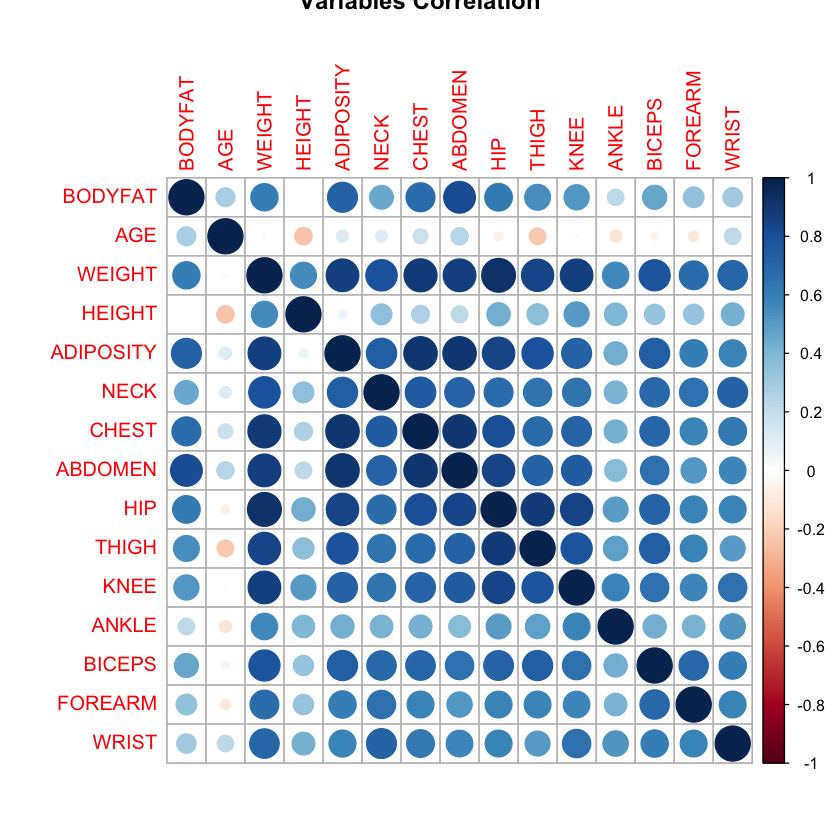

In [68]:
corr=cor(CleanData)
corrplot(corr,title='Variables Correlation')
jpeg(file="Image/Correlation_among_variables.jpeg")
corr=cor(CleanData)
corrplot(corr,title='Variables Correlation')
dev.off()

Most of variables are highly correlated, we will consider the simple model with as few variables as possible in our model.

### VIF test

We test the VIF of the simple linear regression. VIF show the multicollinearity in linear regression model. Once the max VIF is larger than 10 or mean variables' VIF is larger than 1. We regard there exists multicollinearity. Multicollinearity is harmful to model, the model with too many variables which has multicollinearity may be regarded as ill one.

In [27]:
SLR = lm(BODYFAT~.,data=CleanData) 
vif = car::vif(SLR) 
mean(vif) 
rbind(vif)

[1] 41.67936

,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
vif,2.265474,260.9517,65.91225,194.1773,3.826228,10.24344,11.12277,12.0296,7.140305,5.054611,1.789487,3.425929,2.387118,3.184792


Weight enjoys the largest VIF, and there exist serious multicollinearity in our data, therefore in our model we will consider as few variables as possible. 

### BOXCOX test

BOXCOX test can show is there any necessary to transformation, the $\lambda$ from BOXCOX is an optimal for transformation as:

$$
y(\lambda)=\left\{\begin{array}{ll}\frac{y^{\lambda}-1}{\lambda}, & \text { if } \lambda \neq 0 \\ \log y, & \text { if } \lambda=0\end{array}\right.
$$

[1] 1.030303

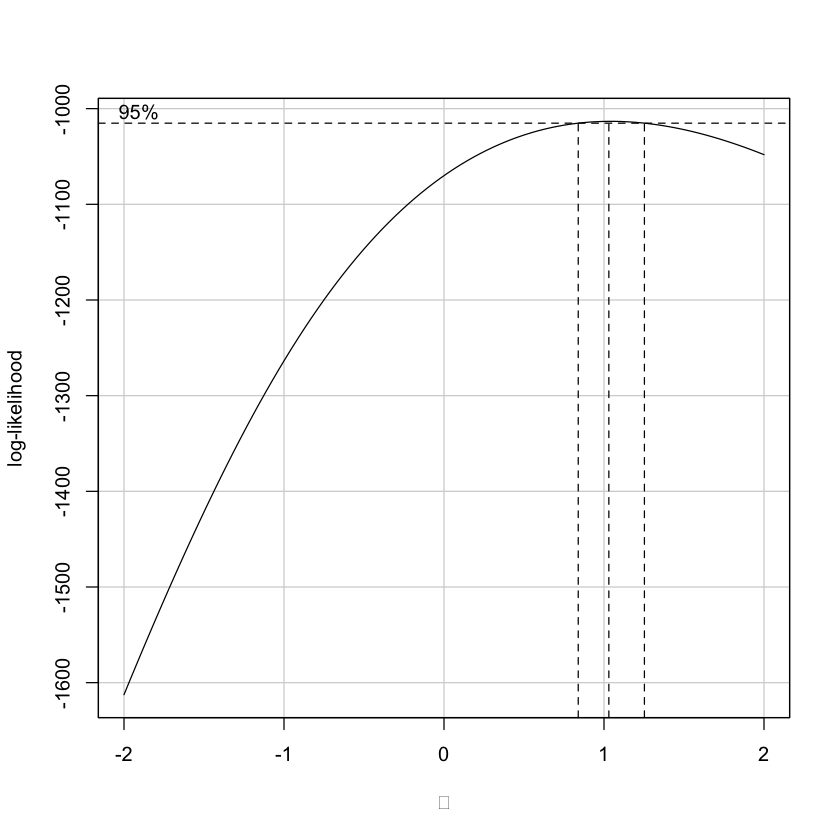

In [28]:
bc=boxCox(SLR)
lambda=bc$x[which(bc$y==max(bc$y))]
lambda

The $\lambda$ is close to 1. It seems that there is no necessary for transformation.

### Simple linear regression of all variables

First we will try use simple linear regression on all variables. In the following output we can see that there is a lot of variables are not significant from p-value, means that there may be not necessary to take them into consideration when we build our model, therefore we will run variables selection steps to simplify our model.

In [29]:
summary(SLR)


Call:
lm(formula = BODYFAT ~ ., data = CleanData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6479 -2.8415 -0.1324  2.8516  9.1206 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -80.51943   54.53989  -1.476  0.14120    
AGE           0.06517    0.02941   2.216  0.02768 *  
WEIGHT       -0.24634    0.15259  -1.614  0.10779    
HEIGHT        1.04965    0.77730   1.350  0.17820    
ADIPOSITY     1.85337    1.10641   1.675  0.09525 .  
NECK         -0.39647    0.21546  -1.840  0.06702 .  
CHEST        -0.14858    0.10189  -1.458  0.14613    
ABDOMEN       0.81367    0.08477   9.599  < 2e-16 ***
HIP          -0.18763    0.13851  -1.355  0.17686    
THIGH         0.16395    0.13671   1.199  0.23164    
KNEE         -0.03708    0.24126  -0.154  0.87800    
ANKLE         0.11686    0.20334   0.575  0.56605    
BICEPS        0.14475    0.15804   0.916  0.36068    
FOREARM       0.22848    0.19125   1.195  0.23344    
WRIST        -1.59006    0.497

pdf 
  2

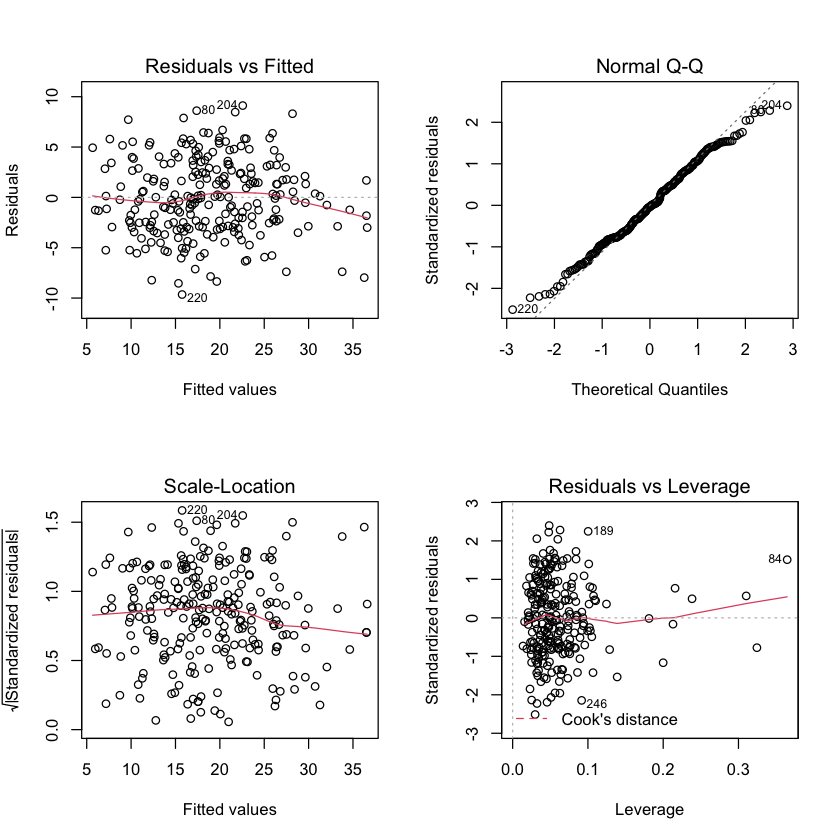

In [30]:
par(mfrow=c(2,2)) 
plot(SLR) 

jpeg(file="Image/Simple_Linear_Regression_Analysis.jpeg")
par(mfrow=c(2,2)) 
plot(SLR) 
dev.off()

### Variable selection-Lasso Regression

First we try use Lasso Regression to build model and select variables. Lasso regression can avoid multicolinearity and choose variables into the final model. The Lasso regression adds a Lasso penalty to loss function and works both on  variable selection to enhance the prediction accuracy. 

In [31]:
x=as.matrix(CleanData[,-1])
y=CleanData$BODYFAT
model_lasso=glmnet(x, y, alpha = 1, family = "gaussian")
cv_lasso=cv.glmnet(x, y, alpha = 1, family = "gaussian")
lambda_lasso=cv_lasso$lambda.min
lambda_lasso
model=glmnet(x, y, alpha = 1, family = "gaussian",lambda=lambda_lasso)
model$beta

[1] 0.1205271

14 x 1 sparse Matrix of class "dgCMatrix"
                   s0
AGE        0.04168313
WEIGHT     .         
HEIGHT    -0.28032210
ADIPOSITY  .         
NECK      -0.22089134
CHEST      .         
ABDOMEN    0.69012676
HIP        .         
THIGH      0.02151504
KNEE       .         
ANKLE      .         
BICEPS     0.02220848
FOREARM    0.06154111
WRIST     -1.24613508

In [69]:
SLR_Lasso = lm( BODYFAT ~ AGE + HEIGHT + NECK + ABDOMEN + BICEPS + FOREARM + WRIST + THIGH,data=CleanData) 
Lasso_vif = car::vif(SLR_Lasso) 
mean(Lasso_vif) 
rbind(Lasso_vif)

[1] 2.881755

,AGE,HEIGHT,NECK,ABDOMEN,BICEPS,FOREARM,WRIST,THIGH
Lasso_vif,2.024772,1.428984,3.339681,3.879848,3.161937,2.289656,2.712438,4.216721


The final model will be BODYFAT ~ AGE + HEIGHT + NECK + ABDOMEN + BICEPS + FOREARM + WRIST + THIGH. The multicolinearity is not so serious. But it seems that this model is very complex, we will concentrate on the variables given above. 

Although there is no necessary for transformation on Y variabls in model, we still want to try is there any space for model improvement when we use transformation on X variables. Because all variables is positive, we try use log and square transformation for all variables. 
    
    
The simple model is SLR0=lm(BODYFAT~1,data=ExtendData), without any variable.

SLR_Full uses all variables without transformation.

SLR_Log_Full uses all variables with log transformation.

SLR_sq_Full uses all variables with square transformation.

SLR_All_Full uses all variables without transformation or with both kinds of transformations.

In [32]:
LogAGE=log(CleanData$AGE)
LogWEIGHT=log(CleanData$WEIGHT)
LogHEIGHT=log(CleanData$HEIGHT)
LogADIPOSITY=log(CleanData$ADIPOSITY)
LogNECK=log(CleanData$NECK)
LogCHEST=log(CleanData$CHEST)
LogABDOMEN=log(CleanData$ABDOMEN)
LogHIP=log(CleanData$HIP)
LogTHIGH=log(CleanData$THIGH)
LogKNEE=log(CleanData$KNEE)
LogANKLE=log(CleanData$ANKLE)
LogBICEPS=log(CleanData$BICEPS)
LogFOREARM=log(CleanData$FOREARM)
LogWRIST=log(CleanData$WRIST)

sqAGE=CleanData$AGE^2
sqWEIGHT=CleanData$WEIGHT^2
sqHEIGHT=CleanData$HEIGHT^2
sqADIPOSITY=CleanData$ADIPOSITY^2
sqNECK=CleanData$NECK^2
sqCHEST=CleanData$CHEST^2
sqABDOMEN=CleanData$ABDOMEN^2
sqHIP=CleanData$HIP^2
sqTHIGH=CleanData$THIGH^2
sqKNEE=CleanData$KNEE^2
sqANKLE=CleanData$ANKLE^2
sqBICEPS=CleanData$BICEPS^2
sqFOREARM=CleanData$FOREARM^2
sqWRIST=CleanData$WRIST^2

ExtendData=cbind(CleanData,LogAGE,LogWEIGHT,LogHEIGHT,LogADIPOSITY,LogNECK,LogCHEST,LogABDOMEN,LogHIP,LogTHIGH,LogKNEE,LogANKLE,LogBICEPS,LogFOREARM,LogWRIST
                 ,sqAGE,sqWEIGHT,sqHEIGHT,sqADIPOSITY,sqNECK,sqCHEST,sqABDOMEN,sqHIP,sqTHIGH,sqKNEE,sqANKLE,sqBICEPS,sqFOREARM,sqWRIST)

SLR0=lm(BODYFAT~1,data=ExtendData)
SLR_Full=lm(BODYFAT~AGE+WEIGHT+HEIGHT+ADIPOSITY+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST,data=ExtendData)
SLR_Log_Full=lm(BODYFAT~LogAGE+LogWEIGHT+LogHEIGHT+LogADIPOSITY+LogNECK+LogCHEST+LogABDOMEN+LogHIP+LogTHIGH+LogKNEE+LogANKLE+LogBICEPS+LogFOREARM+LogWRIST,data=ExtendData)
SLR_sq_Full=lm(BODYFAT~sqAGE+sqWEIGHT+sqHEIGHT+sqADIPOSITY+sqNECK+sqCHEST+sqABDOMEN+sqHIP+sqTHIGH+sqKNEE+sqANKLE+sqBICEPS+sqFOREARM+sqWRIST,data=ExtendData)
SLR_All_Full=lm(BODYFAT~.,data=ExtendData)

### Variable selection-All possible subsets methods

Subsets methods is to find a small subset of variables which are good to predict BODYFAT. The index for subsets method in R can be BIC, Cp and others. 

BIC and AIC are both penalized-likelihood criteria considering both prediction error and model complexity.  Model with small BIC or AIC is better. 

Cp assess the fit of a regression model, a small Cp value indicates that the model is relatively precise.

All possible subsets methods with leaps package. First method to variables selection method is subsets methods, it will choose the best model with BIC, Cp and other index based on the four kinds of full model. 

Although some complex models have better performance, we still do not want to choose them for they are too complex. 

### No transformation

In [33]:
LeapsResults_Full=regsubsets(BODYFAT~AGE+WEIGHT+HEIGHT+ADIPOSITY+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST,data=ExtendData,nbest=1,nvmax =5,method="exhaustive")
LeapsResults_Full_Table=cbind(summary(LeapsResults_Full)$which,summary(LeapsResults_Full)$rsq,summary(LeapsResults_Full)$rss,summary(LeapsResults_Full)$adjr2,summary(LeapsResults_Full)$cp,summary(LeapsResults_Full)$bic)
dimnames(LeapsResults_Full_Table)[[2]]=c(dimnames(summary(LeapsResults_Full)$which)[[2]],"rsq","rss","adjrsq","cp","bic")
LeapsResults_Full_Table

,(Intercept),AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,rsq,rss,adjrsq,cp,bic
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.6610804,4575.124,0.6597027,57.058284,-257.3072
2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.7052744,3978.543,0.7028684,19.801302,-286.4439
3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.7168079,3822.850,0.7133260,11.556220,-290.8305
4,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0.7208570,3768.191,0.7162620,9.959454,-288.8885
5,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0.7243308,3721.297,0.7186352,8.873697,-286.4807


We choose:

BODYFAT~ABDOMEN

BODYFAT~ABDOMEN+WEIGHT

BODYFAT~ABDOMEN+WEIGHT+WRIST

### log transformation

In [34]:
LeapsResults_Log=regsubsets(BODYFAT~LogAGE+LogWEIGHT+LogHEIGHT+LogADIPOSITY+LogNECK+LogCHEST+LogABDOMEN+LogHIP+LogTHIGH+LogKNEE+LogANKLE+LogBICEPS+LogFOREARM+LogWRIST,data=ExtendData,nbest=1,nvmax =5,method="exhaustive")
LeapsResults_Log_Table=cbind(summary(LeapsResults_Log)$which,summary(LeapsResults_Log)$rsq,summary(LeapsResults_Log)$rss,summary(LeapsResults_Log)$adjr2,summary(LeapsResults_Log)$cp,summary(LeapsResults_Log)$bic)
dimnames(LeapsResults_Log_Table)[[2]]=c(dimnames(summary(LeapsResults_Log)$which)[[2]],"rsq","rss","adjrsq","cp","bic")
LeapsResults_Log_Table

,(Intercept),LogAGE,LogWEIGHT,LogHEIGHT,LogADIPOSITY,LogNECK,LogCHEST,LogABDOMEN,LogHIP,LogTHIGH,LogKNEE,LogANKLE,LogBICEPS,LogFOREARM,LogWRIST,rsq,rss,adjrsq,cp,bic
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.6609432,4576.975,0.6595649,57.938292,-257.2069
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.7031501,4007.218,0.7007269,22.352017,-284.6628
3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0.7197553,3783.062,0.7163097,9.564668,-293.4252
4,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0.7247425,3715.740,0.7202115,7.123528,-292.3648
5,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0.7280731,3670.780,0.7224548,6.157527,-289.8705


We choose:

BODYFAT~LogABDOMEN

BODYFAT~LogABDOMEN+LogWRIST

BODYFAT~LogABDOMEN+LogHEIGHT+LogWRIST

### Square transformation

In [35]:
LeapsResults_Square=regsubsets(BODYFAT~sqAGE+sqWEIGHT+sqHEIGHT+sqADIPOSITY+sqNECK+sqCHEST+sqABDOMEN+sqHIP+sqTHIGH+sqKNEE+sqANKLE+sqBICEPS+sqFOREARM+sqWRIST,data=ExtendData,nbest=1,nvmax =5,method="exhaustive")
LeapsResults_Square_Table=cbind(summary(LeapsResults_Square)$which,summary(LeapsResults_Square)$rsq,summary(LeapsResults_Square)$rss,summary(LeapsResults_Square)$adjr2,summary(LeapsResults_Square)$cp,summary(LeapsResults_Square)$bic)
dimnames(LeapsResults_Square_Table)[[2]]=c(dimnames(summary(LeapsResults_Square)$which)[[2]],"rsq","rss","adjrsq","cp","bic")
LeapsResults_Square_Table

,(Intercept),sqAGE,sqWEIGHT,sqHEIGHT,sqADIPOSITY,sqNECK,sqCHEST,sqABDOMEN,sqHIP,sqTHIGH,sqKNEE,sqANKLE,sqBICEPS,sqFOREARM,sqWRIST,rsq,rss,adjrsq,cp,bic
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.6556157,4648.892,0.6542158,52.502614,-253.3404
2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.7016979,4026.822,0.6992628,14.827472,-283.4526
3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.7105030,3907.961,0.7069436,9.246628,-285.3697
4,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0.7146650,3851.777,0.7099682,7.663271,-283.4475
5,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0.7174477,3814.213,0.7116099,7.267455,-280.3646


We choose:

BODYFAT~sqABDOMEN

BODYFAT~sqABDOMEN+sqWEIGHT

BODYFAT~sqABDOMEN+sqWEIGHT+sqWRIST

### All variables

In [70]:
LeapsResults=regsubsets(BODYFAT~.,data=ExtendData,nbest=1,nvmax =5,method="exhaustive")
LeapsResults_Table=cbind(summary(LeapsResults)$which,summary(LeapsResults)$rsq,summary(LeapsResults)$rss,summary(LeapsResults)$adjr2,summary(LeapsResults)$cp,summary(LeapsResults)$bic)
show(LeapsResults_Table)
LeapsResults_Table

  (Intercept) AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP THIGH KNEE
1           1   0      0      0         0    0     0       1   0     0    0
2           1   0      0      0         0    0     0       1   0     0    0
3           1   0      0      0         0    0     0       0   0     0    0
4           1   0      0      0         0    0     0       0   0     0    0
5           1   1      0      0         0    0     0       0   0     0    0
  ANKLE BICEPS FOREARM WRIST LogAGE LogWEIGHT LogHEIGHT LogADIPOSITY LogNECK
1     0      0       0     0      0         0         0            0       0
2     0      0       0     0      0         0         0            0       0
3     0      0       0     0      0         0         0            0       0
4     0      0       0     0      0         0         0            0       1
5     0      0       0     0      0         0         0            0       1
  LogCHEST LogABDOMEN LogHIP LogTHIGH LogKNEE LogANKLE LogBICEPS LogFOREARM
1     

,(Intercept),AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,⋯,sqKNEE,sqANKLE,sqBICEPS,sqFOREARM,sqWRIST,,,,,
1,1,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0.6610804,4575.124,0.6597027,63.41543,-257.3072
2,1,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0.7079455,3942.484,0.7055614,22.90663,-288.7018
3,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0.7200990,3778.424,0.7166576,13.88291,-293.7294
4,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0.7250197,3711.997,0.7204933,11.41954,-292.6147
5,1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0.7284200,3666.097,0.7228088,10.33537,-290.1871


We choose:

BODYFAT~ABDOMEN

BODYFAT~ABDOMEN + sqWEIGHT

BODYFAT~LogWRIST + sqHEIGHT + LogABDOMEN

As you can see in the results, the ABDOMEN is the most important variable. WEIGHT, WRIST are also very important. 

### Variable selection-Forward directions

The forward direction model selection will find the best AIC or BIC model from the simplest model (lm(BODYFAT~1)) to four kinds of full models until no improvement space for AIC or BIC. We will not use backward and stepwise because we prefer simple model.  

### No transformation with AIC

In [37]:
step(SLR0,scope=list(upper=SLR_Full),direction='forward', k=2)

Start:  AIC=993.24
BODYFAT ~ 1

            Df Sum of Sq     RSS    AIC
+ ABDOMEN    1    8924.0  4575.1 726.91
+ ADIPOSITY  1    7096.0  6403.1 810.27
+ CHEST      1    6216.5  7282.6 842.20
+ HIP        1    5117.7  8381.5 877.05
+ WEIGHT     1    4870.1  8629.1 884.27
+ THIGH      1    3944.0  9555.2 909.55
+ KNEE       1    3527.3  9971.8 920.13
+ BICEPS     1    2960.0 10539.1 933.86
+ NECK       1    2794.3 10704.8 937.72
+ FOREARM    1    1626.5 11872.7 963.40
+ WRIST      1    1271.2 12228.0 970.72
+ AGE        1    1129.7 12369.5 973.57
+ ANKLE      1     667.3 12831.9 982.67
<none>                   13499.1 993.24
+ HEIGHT     1       0.1 13499.1 995.24

Step:  AIC=726.91
BODYFAT ~ ABDOMEN

            Df Sum of Sq    RSS    AIC
+ WEIGHT     1    596.58 3978.5 694.26
+ WRIST      1    530.01 4045.1 698.38
+ HEIGHT     1    476.40 4098.7 701.64
+ NECK       1    407.29 4167.8 705.79
+ HIP        1    251.67 4323.5 714.88
+ KNEE       1    245.93 4329.2 715.21
+ CHEST      1   


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + BICEPS + NECK + 
    AGE + ADIPOSITY + CHEST, data = ExtendData)

Coefficients:
(Intercept)      ABDOMEN       WEIGHT        WRIST       BICEPS         NECK  
  -12.02290      0.78669     -0.05785     -1.42026      0.22855     -0.32645  
        AGE    ADIPOSITY        CHEST  
    0.05116      0.47492     -0.14718  


AIC=683.68

BODYFAT ~ ABDOMEN + WEIGHT + WRIST + BICEPS + NECK + AGE + ADIPOSITY + CHEST

### Log transformation with AIC

In [42]:
step(SLR0,scope=list(upper=SLR_Log_Full),direction='forward', k=2)

Start:  AIC=993.24
BODYFAT ~ 1

               Df Sum of Sq     RSS    AIC
+ LogABDOMEN    1    8922.2  4577.0 727.01
+ LogADIPOSITY  1    7090.5  6408.6 810.49
+ LogCHEST      1    6227.2  7271.9 841.83
+ LogHIP        1    5144.5  8354.7 876.25
+ LogWEIGHT     1    4955.9  8543.3 881.79
+ LogTHIGH      1    4012.7  9486.4 907.76
+ LogKNEE       1    3532.0  9967.1 920.02
+ LogBICEPS     1    3047.6 10451.6 931.79
+ LogNECK       1    2772.2 10727.0 938.24
+ LogFOREARM    1    1590.8 11908.3 964.15
+ LogWRIST      1    1261.5 12237.7 970.91
+ LogAGE        1    1123.3 12375.8 973.70
+ LogANKLE      1     751.8 12747.3 981.03
<none>                      13499.1 993.24
+ LogHEIGHT     1       0.2 13499.0 995.24

Step:  AIC=727.01
BODYFAT ~ LogABDOMEN

               Df Sum of Sq    RSS    AIC
+ LogWRIST      1    569.76 4007.2 696.04
+ LogWEIGHT     1    552.07 4024.9 697.13
+ LogHEIGHT     1    508.83 4068.1 699.78
+ LogNECK       1    433.80 4143.2 704.32
+ LogKNEE       1    252.01 4


Call:
lm(formula = BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT + LogNECK + 
    LogAGE + LogFOREARM, data = ExtendData)

Coefficients:
(Intercept)   LogABDOMEN     LogWRIST    LogHEIGHT      LogNECK       LogAGE  
    -91.450       68.874      -27.371      -22.327      -16.644        2.010  
 LogFOREARM  
      7.857  


AIC=679.57

BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT + LogNECK + LogAGE + LogFOREARM

### Square transformation with AIC

In [43]:
step(SLR0,scope=list(upper=SLR_sq_Full),direction='forward', k=2)

Start:  AIC=993.24
BODYFAT ~ 1

              Df Sum of Sq     RSS    AIC
+ sqABDOMEN    1    8850.2  4648.9 730.88
+ sqADIPOSITY  1    7024.0  6475.1 813.05
+ sqCHEST      1    6176.9  7322.2 843.54
+ sqHIP        1    5074.5  8424.6 878.32
+ sqWEIGHT     1    4709.9  8789.3 888.83
+ sqTHIGH      1    3854.1  9645.1 911.87
+ sqKNEE       1    3510.9  9988.2 920.54
+ sqBICEPS     1    2851.5 10647.7 936.40
+ sqNECK       1    2803.5 10695.7 937.51
+ sqFOREARM    1    1636.6 11862.5 963.19
+ sqWRIST      1    1279.0 12220.1 970.56
+ sqAGE        1    1101.4 12397.8 974.14
+ sqANKLE      1     566.3 12932.9 984.62
<none>                     13499.1 993.24
+ sqHEIGHT     1       0.0 13499.1 995.24

Step:  AIC=730.88
BODYFAT ~ sqABDOMEN

              Df Sum of Sq    RSS    AIC
+ sqWEIGHT     1    622.07 4026.8 697.25
+ sqWRIST      1    468.04 4180.9 706.56
+ sqHEIGHT     1    438.81 4210.1 708.29
+ sqNECK       1    353.57 4295.3 713.26
+ sqHIP        1    244.78 4404.1 719.46
+ sqKNEE  


Call:
lm(formula = BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST + sqBICEPS, 
    data = ExtendData)

Coefficients:
(Intercept)    sqABDOMEN     sqWEIGHT      sqWRIST     sqBICEPS  
 -5.3667833    0.0047368   -0.0003115   -0.0322996    0.0041063  


AIC=690.23

BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST + sqBICEPS


### All transformation with AIC

In [44]:
step(SLR0,scope=list(upper=SLR_All_Full),direction='forward', k=2)

Start:  AIC=993.24
BODYFAT ~ 1

               Df Sum of Sq     RSS    AIC
+ ABDOMEN       1    8924.0  4575.1 726.91
+ LogABDOMEN    1    8922.2  4577.0 727.01
+ sqABDOMEN     1    8850.2  4648.9 730.88
+ ADIPOSITY     1    7096.0  6403.1 810.27
+ LogADIPOSITY  1    7090.5  6408.6 810.49
+ sqADIPOSITY   1    7024.0  6475.1 813.05
+ LogCHEST      1    6227.2  7271.9 841.83
+ CHEST         1    6216.5  7282.6 842.20
+ sqCHEST       1    6176.9  7322.2 843.54
+ LogHIP        1    5144.5  8354.7 876.25
+ HIP           1    5117.7  8381.5 877.05
+ sqHIP         1    5074.5  8424.6 878.32
+ LogWEIGHT     1    4955.9  8543.3 881.79
+ WEIGHT        1    4870.1  8629.1 884.27
+ sqWEIGHT      1    4709.9  8789.3 888.83
+ LogTHIGH      1    4012.7  9486.4 907.76
+ THIGH         1    3944.0  9555.2 909.55
+ sqTHIGH       1    3854.1  9645.1 911.87
+ LogKNEE       1    3532.0  9967.1 920.02
+ KNEE          1    3527.3  9971.8 920.13
+ sqKNEE        1    3510.9  9988.2 920.54
+ LogBICEPS     1    3


Call:
lm(formula = BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST + LogADIPOSITY + 
    LogNECK + LogBICEPS + sqBICEPS + AGE + CHEST + sqNECK + sqFOREARM, 
    data = ExtendData)

Coefficients:
 (Intercept)       ABDOMEN      sqWEIGHT      LogWRIST  LogADIPOSITY  
   1.191e+02     7.854e-01    -1.535e-04    -3.109e+01     1.076e+01  
     LogNECK     LogBICEPS      sqBICEPS           AGE         CHEST  
  -1.027e+02     7.441e+01    -3.350e-02     5.816e-02    -1.403e-01  
      sqNECK     sqFOREARM  
   3.160e-02     4.699e-03  


AIC=677.02

BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST + LogADIPOSITY + LogNECK + LogBICEPS + sqBICEPS + AGE + CHEST + sqNECK + sqFOREARM

### No transformation with BIC

In [45]:
step(SLR0,scope=list(upper=SLR_Full),direction='forward', k=log(n))


Start:  AIC=996.76
BODYFAT ~ 1

            Df Sum of Sq     RSS     AIC
+ ABDOMEN    1    8924.0  4575.1  733.94
+ ADIPOSITY  1    7096.0  6403.1  817.30
+ CHEST      1    6216.5  7282.6  849.22
+ HIP        1    5117.7  8381.5  884.07
+ WEIGHT     1    4870.1  8629.1  891.29
+ THIGH      1    3944.0  9555.2  916.58
+ KNEE       1    3527.3  9971.8  927.16
+ BICEPS     1    2960.0 10539.1  940.88
+ NECK       1    2794.3 10704.8  944.75
+ FOREARM    1    1626.5 11872.7  970.43
+ WRIST      1    1271.2 12228.0  977.74
+ AGE        1    1129.7 12369.5  980.60
+ ANKLE      1     667.3 12831.9  989.70
<none>                   13499.1  996.76
+ HEIGHT     1       0.1 13499.1 1002.27

Step:  AIC=733.94
BODYFAT ~ ABDOMEN

            Df Sum of Sq    RSS    AIC
+ WEIGHT     1    596.58 3978.5 704.80
+ WRIST      1    530.01 4045.1 708.92
+ HEIGHT     1    476.40 4098.7 712.18
+ NECK       1    407.29 4167.8 716.33
+ HIP        1    251.67 4323.5 725.42
+ KNEE       1    245.93 4329.2 725.75
+


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = ExtendData)

Coefficients:
(Intercept)      ABDOMEN       WEIGHT        WRIST  
  -24.22925      0.87792     -0.08384     -1.26116  


BIC=700.41

BODYFAT ~ ABDOMEN + WEIGHT + WRIST

### Log transformation with BIC

In [46]:
step(SLR0,scope=list(upper=SLR_Log_Full),direction='forward', k=log(n))


Start:  AIC=996.76
BODYFAT ~ 1

               Df Sum of Sq     RSS     AIC
+ LogABDOMEN    1    8922.2  4577.0  734.04
+ LogADIPOSITY  1    7090.5  6408.6  817.52
+ LogCHEST      1    6227.2  7271.9  848.86
+ LogHIP        1    5144.5  8354.7  883.28
+ LogWEIGHT     1    4955.9  8543.3  888.82
+ LogTHIGH      1    4012.7  9486.4  914.79
+ LogKNEE       1    3532.0  9967.1  927.04
+ LogBICEPS     1    3047.6 10451.6  938.81
+ LogNECK       1    2772.2 10727.0  945.26
+ LogFOREARM    1    1590.8 11908.3  971.17
+ LogWRIST      1    1261.5 12237.7  977.94
+ LogAGE        1    1123.3 12375.8  980.72
+ LogANKLE      1     751.8 12747.3  988.06
<none>                      13499.1  996.76
+ LogHEIGHT     1       0.2 13499.0 1002.27

Step:  AIC=734.04
BODYFAT ~ LogABDOMEN

               Df Sum of Sq    RSS    AIC
+ LogWRIST      1    569.76 4007.2 706.58
+ LogWEIGHT     1    552.07 4024.9 707.67
+ LogHEIGHT     1    508.83 4068.1 710.32
+ LogNECK       1    433.80 4143.2 714.86
+ LogKNEE    


Call:
lm(formula = BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT, data = ExtendData)

Coefficients:
(Intercept)   LogABDOMEN     LogWRIST    LogHEIGHT  
     -79.24        67.16       -28.93       -28.56  


BIC=697.82

BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT

### Square transformation with BIC

In [47]:
step(SLR0,scope=list(upper=SLR_sq_Full),direction='forward', k=log(n))


Start:  AIC=996.76
BODYFAT ~ 1

              Df Sum of Sq     RSS     AIC
+ sqABDOMEN    1    8850.2  4648.9  737.90
+ sqADIPOSITY  1    7024.0  6475.1  820.08
+ sqCHEST      1    6176.9  7322.2  850.57
+ sqHIP        1    5074.5  8424.6  885.35
+ sqWEIGHT     1    4709.9  8789.3  895.86
+ sqTHIGH      1    3854.1  9645.1  918.90
+ sqKNEE       1    3510.9  9988.2  927.57
+ sqBICEPS     1    2851.5 10647.7  943.42
+ sqNECK       1    2803.5 10695.7  944.54
+ sqFOREARM    1    1636.6 11862.5  970.22
+ sqWRIST      1    1279.0 12220.1  977.58
+ sqAGE        1    1101.4 12397.8  981.16
+ sqANKLE      1     566.3 12932.9  991.64
<none>                     13499.1  996.76
+ sqHEIGHT     1       0.0 13499.1 1002.27

Step:  AIC=737.9
BODYFAT ~ sqABDOMEN

              Df Sum of Sq    RSS    AIC
+ sqWEIGHT     1    622.07 4026.8 707.79
+ sqWRIST      1    468.04 4180.9 717.10
+ sqHEIGHT     1    438.81 4210.1 718.83
+ sqNECK       1    353.57 4295.3 723.80
+ sqHIP        1    244.78 4404.1 73


Call:
lm(formula = BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST, data = ExtendData)

Coefficients:
(Intercept)    sqABDOMEN     sqWEIGHT      sqWRIST  
  -3.621745     0.004695    -0.000248    -0.029718  


BIC=705.87

BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST

### All transformation with BIC

In [48]:
step(SLR0,scope=list(upper=SLR_All_Full),direction='forward', k=log(n))


Start:  AIC=996.76
BODYFAT ~ 1

               Df Sum of Sq     RSS     AIC
+ ABDOMEN       1    8924.0  4575.1  733.94
+ LogABDOMEN    1    8922.2  4577.0  734.04
+ sqABDOMEN     1    8850.2  4648.9  737.90
+ ADIPOSITY     1    7096.0  6403.1  817.30
+ LogADIPOSITY  1    7090.5  6408.6  817.52
+ sqADIPOSITY   1    7024.0  6475.1  820.08
+ LogCHEST      1    6227.2  7271.9  848.86
+ CHEST         1    6216.5  7282.6  849.22
+ sqCHEST       1    6176.9  7322.2  850.57
+ LogHIP        1    5144.5  8354.7  883.28
+ HIP           1    5117.7  8381.5  884.07
+ sqHIP         1    5074.5  8424.6  885.35
+ LogWEIGHT     1    4955.9  8543.3  888.82
+ WEIGHT        1    4870.1  8629.1  891.29
+ sqWEIGHT      1    4709.9  8789.3  895.86
+ LogTHIGH      1    4012.7  9486.4  914.79
+ THIGH         1    3944.0  9555.2  916.58
+ sqTHIGH       1    3854.1  9645.1  918.90
+ LogKNEE       1    3532.0  9967.1  927.04
+ KNEE          1    3527.3  9971.8  927.16
+ sqKNEE        1    3510.9  9988.2  927.57



Call:
lm(formula = BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST, data = ExtendData)

Coefficients:
(Intercept)      ABDOMEN     sqWEIGHT     LogWRIST  
  1.132e+01    8.856e-01   -2.402e-04   -2.288e+01  


BIC=697.68

BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST

As you can see, the BIC can give more simple and better model. Therefore we will consider some alternative models and their simplify version:

We consider the ABDOMEN as the most important variables and WEIGHT as the second one. 

BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST

BODYFAT ~ ABDOMEN + sqWEIGHT

BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST

BODYFAT ~ sqABDOMEN + sqWEIGHT

BODYFAT ~ sqABDOMEN

BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT

BODYFAT ~ LogABDOMEN + LogWRIST

BODYFAT ~ LogABDOMEN

BODYFAT ~ ABDOMEN + WEIGHT + WRIST

BODYFAT ~ ABDOMEN + WEIGHT

BODYFAT ~ ABDOMEN

### Model selection-Cross Validation

Therefore, we will use cross validation method to select the best model for our final model. We will use 30-repeated 10-fold cross-validation, because there is only more than 240 data, if we use only 10-fold cross-validation without repeat, the output will vibrate. The 10-fold cross validation sample the dataset into train and test part which build the model with train part dataset and calculate the R square and sum of residual with test part. Cross validation methods help us know model's ability to predict new data that was not used in trainning.

In [39]:
set.seed(1) 
train.control <- trainControl(method = "repeatedcv", number = 10, repeats=30)

model1=train(BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable=model1$results[c(2,3)]

model2=train(BODYFAT ~ ABDOMEN + sqWEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[2,]=model2$results[c(2,3)]

model3=train(BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[3,]=model3$results[c(2,3)]

model4=train(BODYFAT ~ sqABDOMEN + sqWEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[4,]=model4$results[c(2,3)]

model5=train(BODYFAT ~ sqABDOMEN, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[5,]=model5$results[c(2,3)]

model6=train(BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[6,]=model6$results[c(2,3)]

model7=train(BODYFAT ~ LogABDOMEN + LogWRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[7,]=model7$results[c(2,3)]

model8=train(BODYFAT ~ LogABDOMEN, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[8,]=model8$results[c(2,3)]

model9=train(BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[9,]=model9$results[c(2,3)]

model10=train(BODYFAT ~ ABDOMEN + WEIGHT, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[10,]=model10$results[c(2,3)]

model11=train(BODYFAT ~ ABDOMEN, data = ExtendData, method = "lm",trControl = train.control)
CrossValidationTable[11,]=model11$results[c(2,3)]

ColModel=c("BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST",
           "BODYFAT ~ ABDOMEN + sqWEIGHT",
           "BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST",
           "BODYFAT ~ sqABDOMEN + sqWEIGHT",
           "BODYFAT ~ sqABDOMEN",
           "BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT",
           "BODYFAT ~ LogABDOMEN + LogWRIST",
           "BODYFAT ~ LogABDOMEN",
           "BODYFAT ~ ABDOMEN + WEIGHT + WRIST",
           "BODYFAT ~ ABDOMEN + WEIGHT",
           "BODYFAT ~ ABDOMEN")

In [40]:
CrossValidationTable=cbind(ColModel,CrossValidationTable)
colnames(CrossValidationTable)=c("Model","Root Mean Squared Error, RMSE","R-squared, R2")
CrossValidationTable

,Model,"Root Mean Squared Error, RMSE","R-squared, R2"
,<chr>,<dbl>,<dbl>
1,BODYFAT ~ ABDOMEN + sqWEIGHT + LogWRIST,3.937862,0.7247008
2,BODYFAT ~ ABDOMEN + sqWEIGHT,4.003475,0.7136670
3,BODYFAT ~ sqABDOMEN + sqWEIGHT + sqWRIST,4.003981,0.7160629
4,BODYFAT ~ sqABDOMEN + sqWEIGHT,4.042249,0.7085140
5,BODYFAT ~ sqABDOMEN,4.320769,0.6634867
6,BODYFAT ~ LogABDOMEN + LogWRIST + LogHEIGHT,3.936800,0.7203500
7,BODYFAT ~ LogABDOMEN + LogWRIST,4.035844,0.7090924
8,BODYFAT ~ LogABDOMEN,4.294042,0.6701187
9,BODYFAT ~ ABDOMEN + WEIGHT + WRIST,3.955417,0.7190513


Root Mean Square Error measures the differences between predicted and estimator. The smaller the better. 

R square measures the proportion of the variance in variables our model explains. The larger the better. 

It seems that 

1. There is improvement from model with 1 variable to that with 2 variables. Therefore we decide to choose model with 2 and 3 variables. 

2. There is almost no difference between model with and without transformation, with rule that we prefer simple model, we decide to choose from model without transformation.

3. The model 9 is our final one, which has small sum of squares and large R square. There is discussion about whether model 10 is better for it is simpler, but considering the results of anova results of significant of WRIST and outputs of results of two model, we still want to choose model 9.

In [41]:
anova(lm(BODYFAT ~ ABDOMEN + WEIGHT + WRIST,data=CleanData),lm(BODYFAT ~ ABDOMEN + WEIGHT,data=CleanData))

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,244,3822.850,NA,NA,NA,NA
2,245,3978.543,-1,-155.6925,9.937342,0.001822296


The p-value is smaller than 0.05, we reject the H0: coefficient of WRIST is 0 and hold that it is necessary to put WRIST into our model

In [42]:
summary(lm(BODYFAT ~ ABDOMEN + WEIGHT + WRIST,data=CleanData))
summary(lm(BODYFAT ~ ABDOMEN + WEIGHT,data=CleanData))


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = CleanData)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9974 -2.8917 -0.3257  2.9782  9.2271 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.22925    6.27922  -3.859 0.000146 ***
ABDOMEN       0.87792    0.05210  16.851  < 2e-16 ***
WEIGHT       -0.08384    0.02226  -3.766 0.000208 ***
WRIST        -1.26116    0.40007  -3.152 0.001822 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.958 on 244 degrees of freedom
Multiple R-squared:  0.7168,	Adjusted R-squared:  0.7133 
F-statistic: 205.9 on 3 and 244 DF,  p-value: < 2.2e-16



Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT, data = CleanData)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.086  -2.930  -0.114   2.926   9.930 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -42.39091    2.54235 -16.674  < 2e-16 ***
ABDOMEN       0.89355    0.05280  16.923  < 2e-16 ***
WEIGHT       -0.11893    0.01962  -6.061 5.07e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.03 on 245 degrees of freedom
Multiple R-squared:  0.7053,	Adjusted R-squared:  0.7029 
F-statistic: 293.1 on 2 and 245 DF,  p-value: < 2.2e-16


Model 9 also performs very well. 

## Model diagnosis

The units of variables are different, but we still want to keep the initial unit, the coefficient can fix the unit problem


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = CleanData)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9974 -2.8917 -0.3257  2.9782  9.2271 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.22925    6.27922  -3.859 0.000146 ***
ABDOMEN       0.87792    0.05210  16.851  < 2e-16 ***
WEIGHT       -0.08384    0.02226  -3.766 0.000208 ***
WRIST        -1.26116    0.40007  -3.152 0.001822 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.958 on 244 degrees of freedom
Multiple R-squared:  0.7168,	Adjusted R-squared:  0.7133 
F-statistic: 205.9 on 3 and 244 DF,  p-value: < 2.2e-16


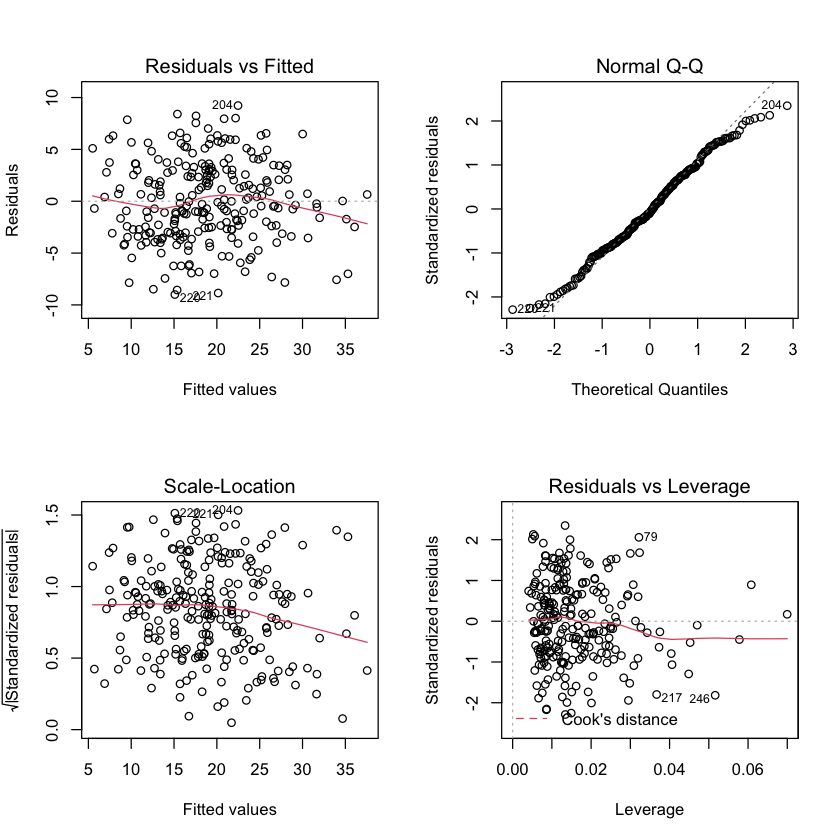

In [43]:
FinalModel=lm(BODYFAT ~ ABDOMEN + WEIGHT + WRIST,data=CleanData)
summary(FinalModel)
par(mfrow=c(2,2)) 
plot(FinalModel)

Our final model:

BODYFAT=0.87792 ABDOMEN-0.08384 WEIGHT-1.26116 WRIST -24.22925

All p value is smaller than 0.05, means that we will reject H0: coefficient of WEIGHT (or WRIST, ABDOMEN) is 0. 

All coefficients are significant, there are clear linear relationships between BODYFAT and the three variables. 

Rule of thumb is sum of 0.87792 times ABDOMEN, -0.08384 times WEIGHT, -1.26116 times WRIST and -24.22925, which will be the BODYFAT(%)

Example usage: for example, a person with 154.25 lbs WEIGHT, 17.1 cm WRIST and 85.2 cm ABDOMEN, his predicted BODYFAT will be 16.07%, the 95% CI will be [8.2,23.9]. There is a 95% probability that his body fat is between 8.2% and 23.9%. 


In [75]:
predict(FinalModel,newdata=data.frame(WEIGHT=154.25,WRIST=17.1,ABDOMEN=85.2),interval="predict")

,fit,lwr,upr
1,16.07229,8.235409,23.90917




The Rsquare is 0.7168, our model can explain 71.68% of variability in dataset. 

From our model we can see that:

by increasing one unit in ABDOMEN with other variables hold, BODYFAT will increase 0.87792%, 

by increasing one unit in WEIGHT with other variables hold, BODYFAT will decrease 0.08384%, 

by increasing one unit in WRIST with other variables hold, BODYFAT will decrease 1.26116%.

And the 95% CI for coefficient is:

In [45]:
confint(FinalModel)

,2.5 %,97.5 %
(Intercept),-36.5976496,-11.8608572
ABDOMEN,0.7752994,0.9805458
WEIGHT,-0.1276779,-0.0399922
WRIST,-2.0491964,-0.4731317


Which means that we are 95% confident that the interval above contains the true coefficients.


In [46]:
vif = car::vif(FinalModel) 
mean(vif) 
vif


[1] 3.819638

ABDOMEN   WEIGHT    WRIST 
4.075237 5.385934 1.997742

There is no serious multicollinearity

### Standardized Residuals

Standardized residuals:
$$r_i=\frac{e_i}{\sqrt{\hat{\sigma}^2(1-h_{ii})}}$$
where $e = Y-\hat{Y}$, $h_{ii}$ is diagonal elements from  $H=X(X'X)^{-1}X'$ and $\hat{\sigma}^2=\text{MSE}$.

Standardized residuals can compare residuals with the same scale. There is no rule of thumb for standardized residuals, the ith observation may be outliers if $r_i$ is large. Residual plots is also for test linearity and constant variance assumptions.

Saving 7 x 7 in image



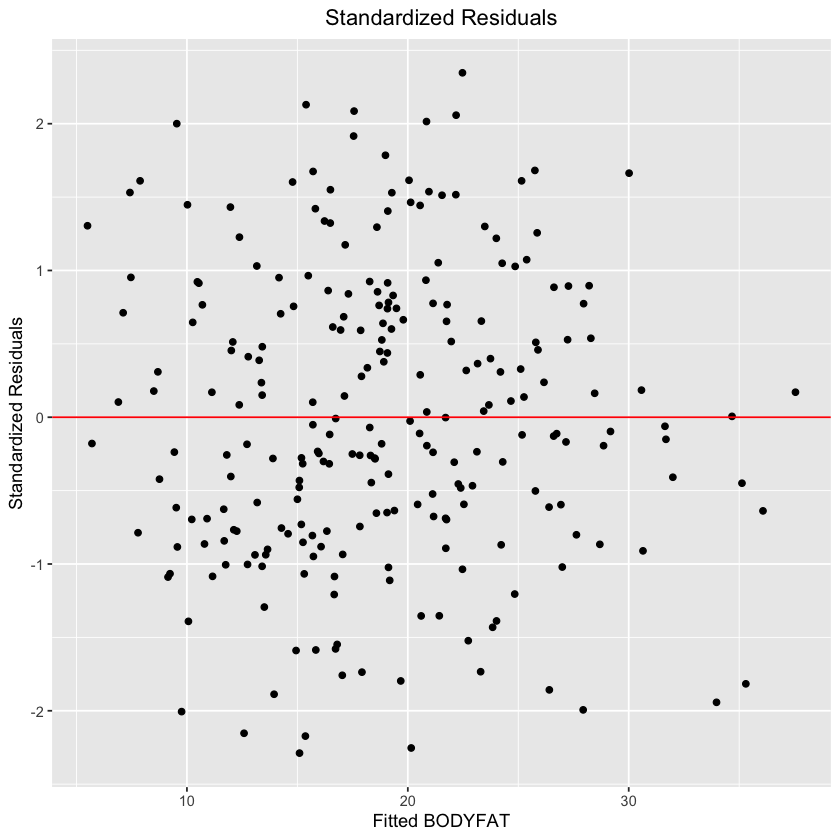

In [47]:

g=ggplot()+
geom_point(aes(x=predict(FinalModel),rstandard(FinalModel)))+
xlab("Fitted BODYFAT")+
ylab("Standardized Residuals")+
ggtitle("Standardized Residuals")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept = 0,color="red")
ggsave("Image/Final_Model_Standardized_Residuals.jpeg",g)
g

There is no obvious outliers from standardized residuals plots and there is no special pattern, which means that the linearity and constant variance assumptions hold.

### QQ plot for residual 

QQ plot is for test of normality assumption. 

pdf 
  2

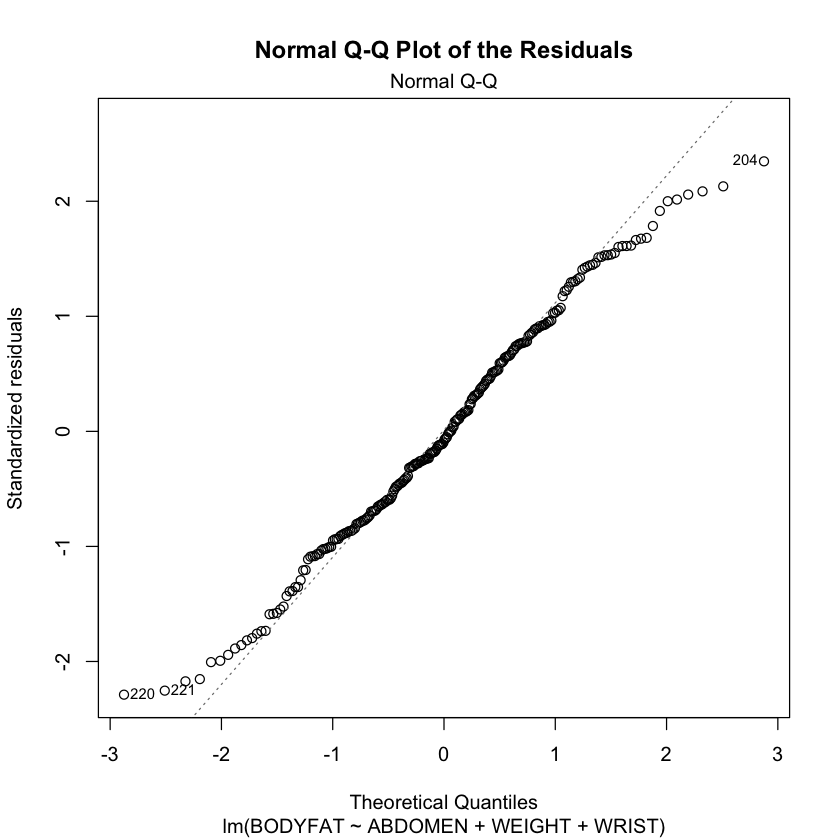

In [48]:
plot(FinalModel, which=c(2),main="Normal Q-Q Plot of the Residuals")
jpeg(file="Image/Final_Model_QQPLOT.jpeg")
plot(FinalModel, which=c(2),main="Normal Q-Q Plot of the Residuals")
dev.off()

In [49]:
shapiro.test(rstandard(FinalModel))


	Shapiro-Wilk normality test

data:  rstandard(FinalModel)
W = 0.99031, p-value = 0.0976


The normality perform well in our model except some outliers, the same result can also be got from the Shapiro–Wilk test, which is a test of normality. p-value is larger than 0.05, we regard that the residual meets the normal distribution.

### Leverage Plots

The leverage $h_{ii}$ (diagonal elements from  $H=X(X'X)^{-1}X'$)  is a measure of the distance between $X_i$ and mean of $X$. The rule of thumb is that if $h_{ii}$ is larger than $2*p/n$. It will be a outlying in $X$. $p$ is number of variables in model including intercept. 

In [50]:
dim(model.matrix(FinalModel))

[1] 248   4

Saving 7 x 7 in image



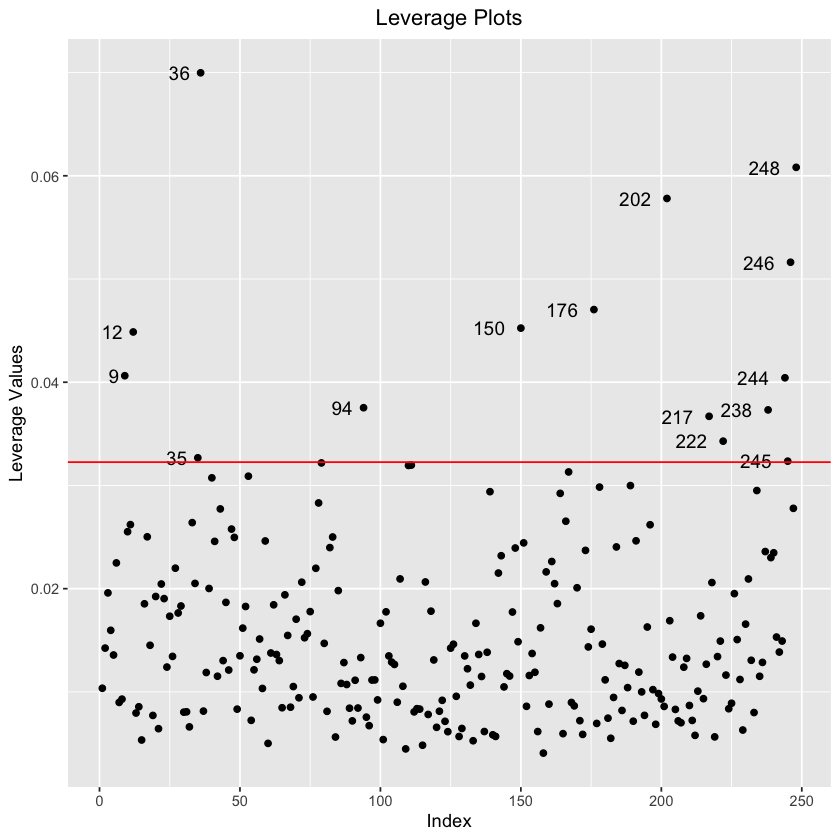

In [51]:
p=dim(model.matrix(FinalModel))[2]
n=dim(model.matrix(FinalModel))[1]
outliers=which(hatvalues(FinalModel)>2*p/n)
g=ggplot()+
geom_point(aes(x=1:n, hatvalues(FinalModel)))+
geom_text(aes(x=outliers,y=hatvalues(FinalModel)[outliers],
                label=outliers),size = 4,hjust = 1.5)+
xlab("Index")+
ylab("Leverage Values")+
ggtitle("Leverage Plots")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept =2*p/n,color="red")
ggsave("Image/Final_Model_Leverage_Plots.jpeg",g)
g

There is a lot of outliers from Leverage plots, but if you try to build a new model for dataset without outliers, there is almost no difference between the new and old models. So we decide to keep the initial model.

In [52]:
FinalModel2=lm(BODYFAT ~ ABDOMEN + WEIGHT + WRIST,data=CleanData[-outliers,]) 

In [53]:
summary(FinalModel2)


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = CleanData[-outliers, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1119 -2.8870 -0.2026  2.8464  9.0497 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -22.43134    6.99358  -3.207  0.00153 ** 
ABDOMEN       0.87763    0.06018  14.584  < 2e-16 ***
WEIGHT       -0.07934    0.02585  -3.069  0.00240 ** 
WRIST        -1.39633    0.44868  -3.112  0.00209 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.964 on 229 degrees of freedom
Multiple R-squared:  0.6895,	Adjusted R-squared:  0.6854 
F-statistic: 169.5 on 3 and 229 DF,  p-value: < 2.2e-16


### Cook's distance

$$D_i=\frac{\sum_{j=1}^n(\hat{Y}_j-\hat{Y}_{j(i)})^2}{p\hat{\sigma}^2}$$ is called Cook's distance, where $\hat{Y}_{j(i)}$ are the prediction for point $j$ without observation $i$ included in regression.  which measure the influence of ith observation on all n fitted values. The rule of thumb is that if $D_i$ is larger than $F_{0.5}(p,n-p)$, we regard it as a outliers. 

Saving 7 x 7 in image



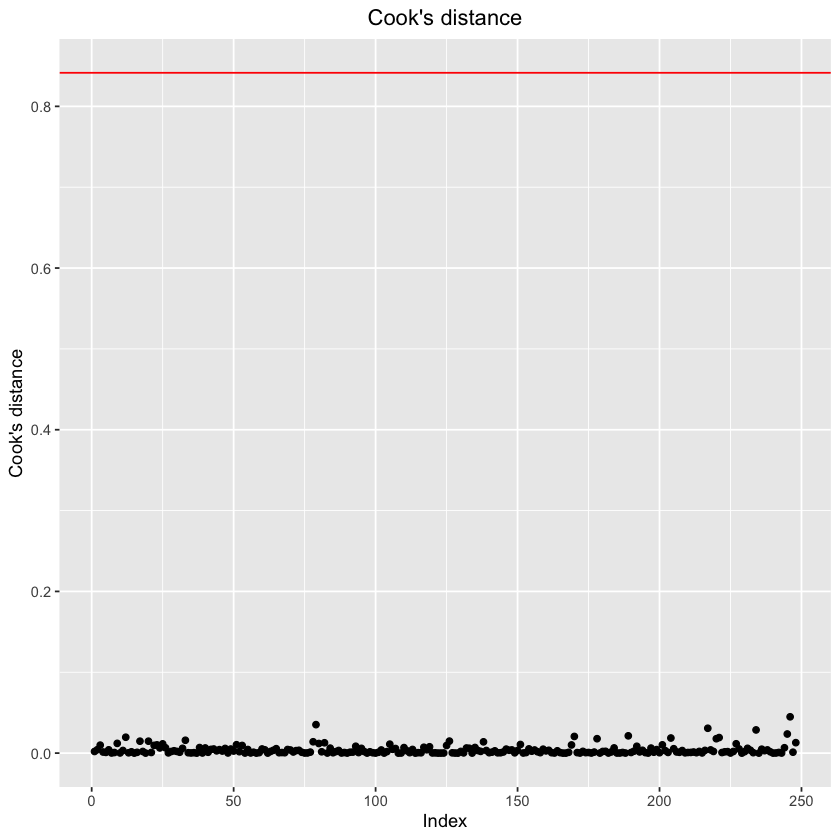

In [54]:
p=dim(model.matrix(FinalModel))[2]
n=dim(model.matrix(FinalModel))[1]
cooki=cooks.distance(FinalModel)
outliers=which(cooki>qf(0.5, p, n-p))
g=ggplot()+
geom_point(aes(x=1:n, y=cooki))+
geom_text(aes(x=outliers,y=cooki[outliers],
                label=outliers),size = 4,hjust = 1.5)+
xlab("Index")+
ylab("Cook's distance")+
ggtitle("Cook's distance")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept =qf(0.5, p, n-p),color="red")
ggsave("Image/Final_Model_Cooks_distance.jpeg",g)
g

No outliers from Cook's distance plot. 

### DFFITS

$$\text{DFFITS}_i = \frac{\hat{Y}_i-\hat{Y}_{i(i)}}{\hat{\sigma}_{(i)}\sqrt{h_{ii}}}$$ where $\hat{Y}_{i(i)}$ are the prediction for point $i$ without observation $i$ included in regression. 

DFFITS measures the influence of the ith observation on the fitted value $\hat{Y}_i$. The rule of thumb for small dataset is $abs(DFFITS)>1$, for large dataset is $abs(DFFITS)>2\sqrt{p/n}$

Saving 7 x 7 in image



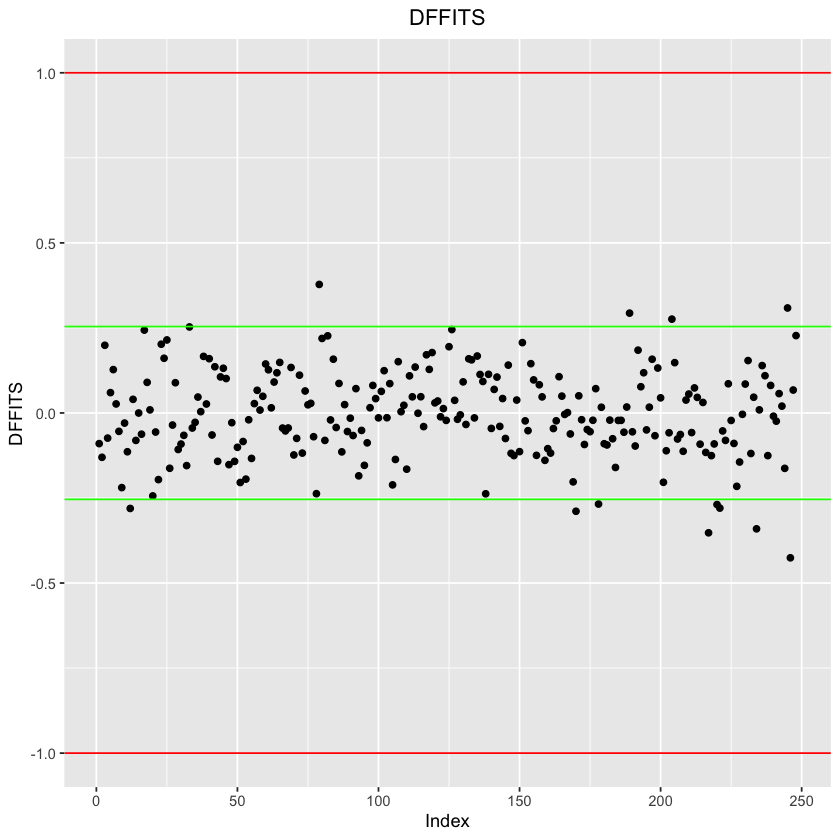

In [55]:
p=dim(model.matrix(FinalModel))[2]
n=dim(model.matrix(FinalModel))[1]
DFFITS=dffits(FinalModel)
outliers=which(abs(DFFITS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DFFITS))+
geom_text(aes(x=outliers,y=DFFITS[outliers],
                label=outliers),size = 4,hjust = 1.5)+
xlab("Index")+
ylab("DFFITS")+
ggtitle("DFFITS")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2*sqrt(p/n),color="green")+
geom_hline(yintercept =-2*sqrt(p/n),color="green")
ggsave("Image/Final_Model_DFFITS.jpeg",g)
g

The red lines is the outliers rule of thumb for small dataset, and green lines is that for large dataset. We regard our dataset as a small one so there is no outliers from DFFITS.

### DFBETAS

$$\text{DFBETAS}_{k(i)}=\frac{\hat{\beta}_k-\hat{\beta}_{k(i)}}{\sqrt{\hat{\sigma}^2_{(i)}(X^T X)^{-1}_{kk}}}$$ is DFBETAS, $\hat{\beta}_{k(i)}$ is the estimated kth parameters without i points.

The DFBETAS measures the influence of ith observation on the fit of the regression coefficient $\beta_k$. The rule of thumb for small dataset is $abs(DFBETAS)>1$, for large dataset is $abs(DFBETAS)>2/\sqrt{n}$

Saving 7 x 7 in image



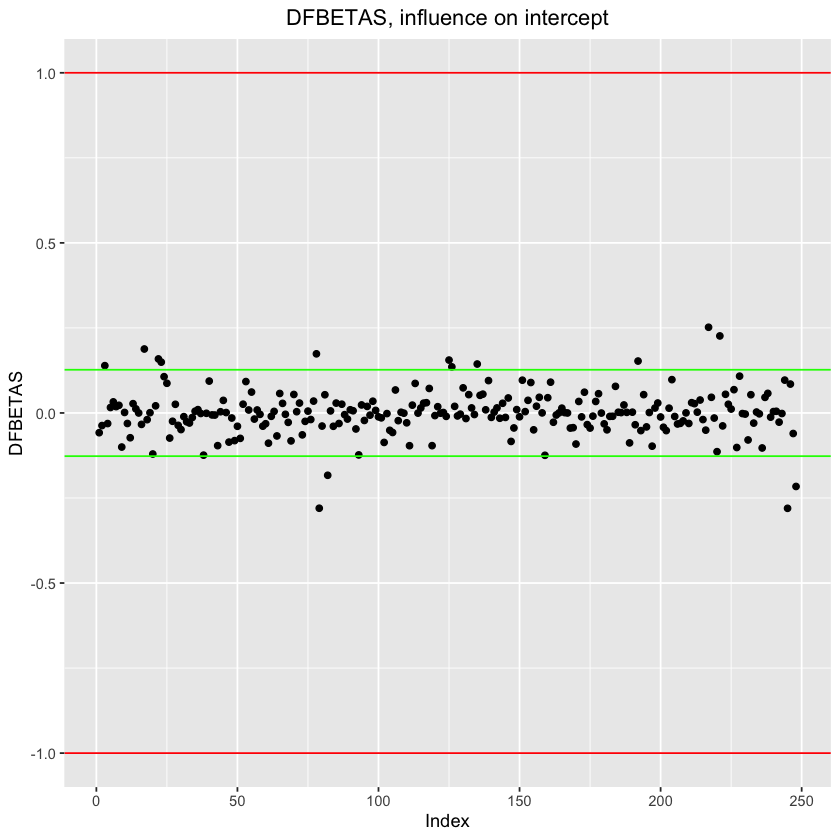

In [71]:
p=dim(model.matrix(FinalModel))[2]
n=dim(model.matrix(FinalModel))[1]
DFBETAS=dfbetas(FinalModel)
outliers=which(abs(DFBETAS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DFBETAS[,1]))+
geom_text(aes(x=outliers,y=DFBETAS[outliers],
                label=outliers),size = 4,hjust = 1.5)+
xlab("Index")+
ylab("DFBETAS")+
ggtitle("DFBETAS, influence on intercept")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2/sqrt(n),color="green")+
geom_hline(yintercept =-2/sqrt(n),color="green")
ggsave("Image/Final_Model_DFBETAS_influence_on_intercept.jpeg",g)
g

Saving 7 x 7 in image



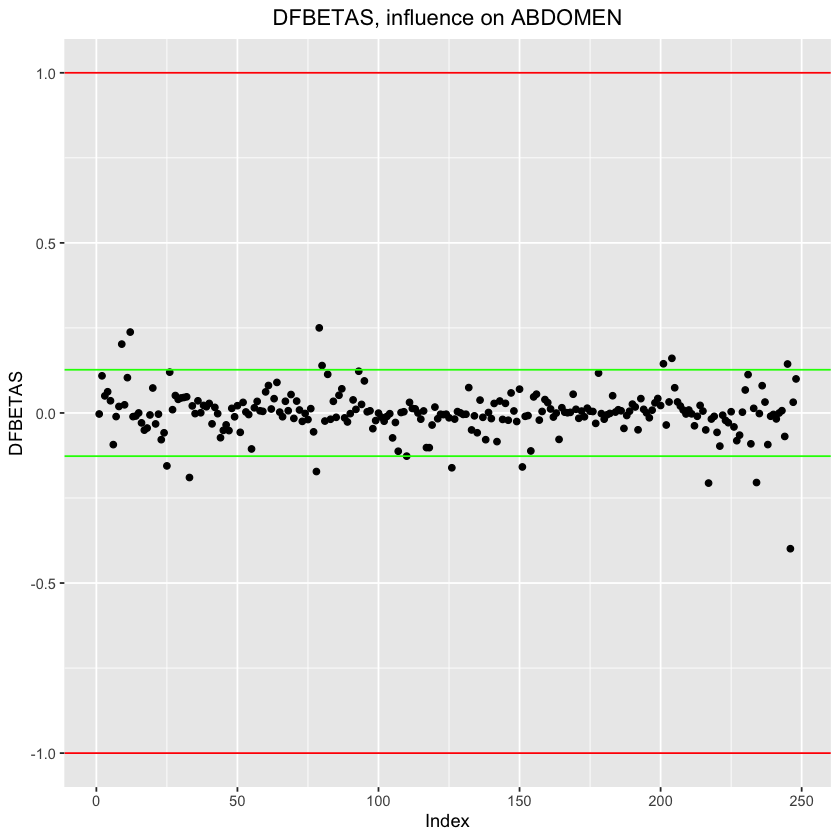

In [72]:
p=dim(model.matrix(FinalModel))[2]
n=dim(model.matrix(FinalModel))[1]
DFBETAS=dfbetas(FinalModel)
outliers=which(abs(DFBETAS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DFBETAS[,2]))+
geom_text(aes(x=outliers,y=DFBETAS[outliers],
                label=outliers),size = 4,hjust = 1.5)+
xlab("Index")+
ylab("DFBETAS")+
ggtitle("DFBETAS, influence on ABDOMEN")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2/sqrt(n),color="green")+
geom_hline(yintercept =-2/sqrt(n),color="green")
ggsave("Image/Final_Model_DFBETAS_influence_on_ABDOMEN.jpeg",g)
g

Saving 7 x 7 in image



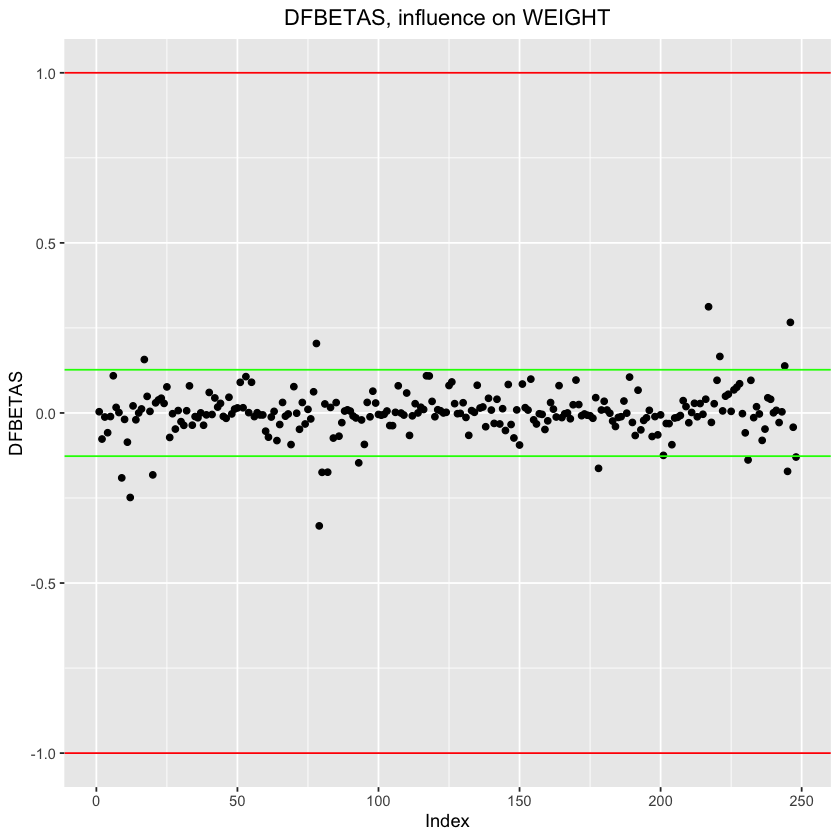

In [73]:
p=dim(model.matrix(FinalModel))[2]
n=dim(model.matrix(FinalModel))[1]
DFBETAS=dfbetas(FinalModel)
outliers=which(abs(DFBETAS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DFBETAS[,3]))+
geom_text(aes(x=outliers,y=DFBETAS[outliers],
                label=outliers),size = 4,hjust = 1.5)+
xlab("Index")+
ylab("DFBETAS")+
ggtitle("DFBETAS, influence on WEIGHT")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2/sqrt(n),color="green")+
geom_hline(yintercept =-2/sqrt(n),color="green")
ggsave("Image/Final_Model_DFBETAS_influence_on_WEIGHT.jpeg",g)
g

Saving 7 x 7 in image



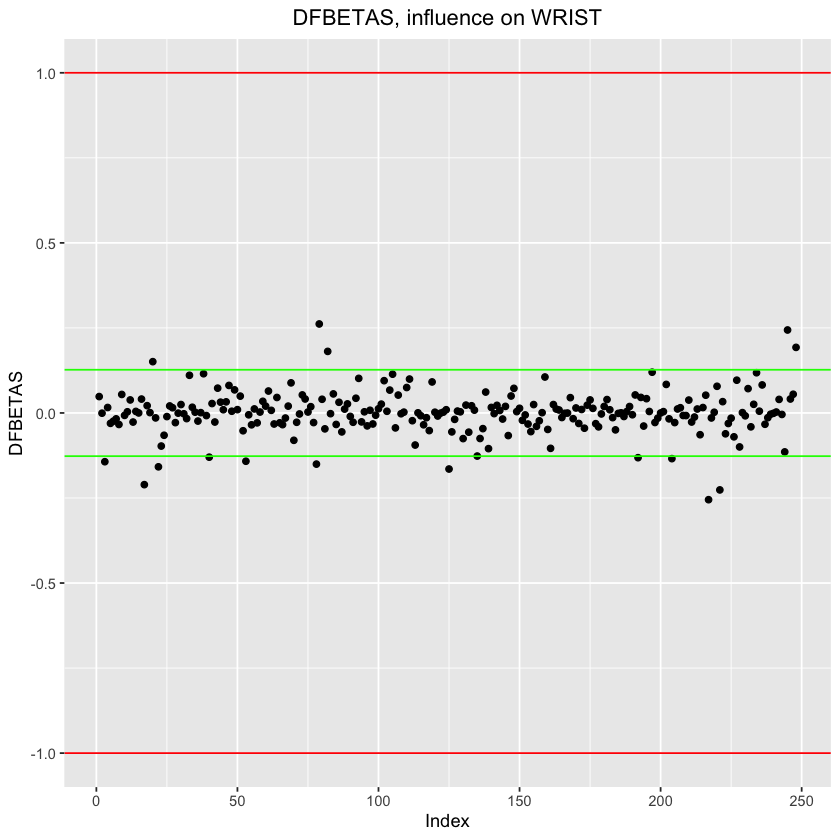

In [74]:
p=dim(model.matrix(FinalModel))[2]
n=dim(model.matrix(FinalModel))[1]
DFBETAS=dfbetas(FinalModel)
outliers=which(abs(DFBETAS)>1)
g=ggplot()+
geom_point(aes(x=1:n, y=DFBETAS[,4]))+
geom_text(aes(x=outliers,y=DFBETAS[outliers],
                label=outliers),size = 4,hjust = 1.5)+
xlab("Index")+
ylab("DFBETAS")+
ggtitle("DFBETAS, influence on WRIST")+
theme(plot.title = element_text(hjust = 0.5))+
geom_hline(yintercept =1,color="red")+
geom_hline(yintercept =-1,color="red")+
geom_hline(yintercept =2/sqrt(n),color="green")+
geom_hline(yintercept =-2/sqrt(n),color="green")
ggsave("Image/Final_Model_DFBETAS_influence_on_WRIST.jpeg",g)
g

The red lines is the outliers rule of thumb for small dataset, and green lines is that for large dataset. We regard our dataset as a small one so there is no outliers from DFBETAS.


### Strength and Weakness of Model

Our model enjoys good R square and small sum of residual. The linearity, normality and constant variance assumptions hold. The model explain more than 70% of variation in body fat. But our model includes three inputs, may be a little complex. 